# ***Import Lib***

In [ ]:
!pip install -U shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.2 MB/s eta 0:00:00


In [ ]:
#!pip install -U scikit-learn

In [ ]:
#load data from google drive
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Libraries
import numpy as np
import pandas as pd

# Model Training
from sklearn.model_selection import GridSearchCV, train_test_split

# Model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict

# Visualization
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore Warings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 5

random.seed(42)

# ***Load Dataset***

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dementia/dementia_patients_health_data.csv')
df.head()

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   

      Weight  MRI_Delay Prescription  Dosage in mg  Age  ...  Smoking_Status  \
0  57.563978  36.421028          NaN           NaN   60  ...  Current Smoker   
1  56.832335  31.157633  Galantamine          12.0   61  ...   Former Smoker   
2  59.759066  37.640435          NaN           NaN   69  ...   Former Smoker   
3  58.266471  50.673992    Donepezil          23.0   78  ...    Never Smoked   
4  67.705027  27.810601    Memantine          20.0   77  ...    Never Smoked   

    APOE_ε4  Physical_Activity Depression_Status Cognitive_Test_Scores  \
0  Negative          Sedentary                No                    10   
1  Positive  Moderate Activity                No                     1   
2  Negative  Moderate Activity                No                     8   
3  Negative      Mild Activity               Yes                     5   
4  Positive      Mild Activity                No                     0   

  Medication_History      Nutrition_Diet Sleep_Quality  \
0                 No       Low-Carb Diet          Poor   
1                Yes       Low-Carb Diet          Poor   
2                 No  Mediterranean Diet          Poor   
3                Yes       Balanced Diet          Poor   
4                Yes       Low-Carb Diet          Good   

   Chronic_Health_Conditions Dementia  
0                   Diabetes        0  
1              Heart Disease        1  
2              Heart Disease        0  
3               Hypertension        1  
4                   Diabetes        1  

[5 rows x 24 columns]

In [ ]:
# Replace NaN values with the mean of the column
df.fillna(df.mean(), inplace=True)

In [ ]:
df.head()

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   

      Weight  MRI_Delay Prescription  Dosage in mg  Age  ...  Smoking_Status  \
0  57.563978  36.421028          NaN      9.213402   60  ...  Current Smoker   
1  56.832335  31.157633  Galantamine     12.000000   61  ...   Former Smoker   
2  59.759066  37.640435          NaN      9.213402   69  ...   Former Smoker   
3  58.266471  50.673992    Donepezil     23.000000   78  ...    Never Smoked   
4  67.705027  27.810601    Memantine     20.000000   77  ...    Never Smoked   

    APOE_ε4  Physical_Activity Depression_Status Cognitive_Test_Scores  \
0  Negative          Sedentary                No                    10   
1  Positive  Moderate Activity                No                     1   
2  Negative  Moderate Activity                No                     8   
3  Negative      Mild Activity               Yes                     5   
4  Positive      Mild Activity                No                     0   

  Medication_History      Nutrition_Diet Sleep_Quality  \
0                 No       Low-Carb Diet          Poor   
1                Yes       Low-Carb Diet          Poor   
2                 No  Mediterranean Diet          Poor   
3                Yes       Balanced Diet          Poor   
4                Yes       Low-Carb Diet          Good   

   Chronic_Health_Conditions Dementia  
0                   Diabetes        0  
1              Heart Disease        1  
2              Heart Disease        0  
3               Hypertension        1  
4                   Diabetes        1  

[5 rows x 24 columns]

In [ ]:
df.columns

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

In [ ]:
df.shape

(1000, 24)

In [ ]:
df.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                   0
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions      0
Dementia                       0
dtype: int64

In [ ]:
# Replace NaN values with the mean of the column
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                   0
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions      0
Dementia                       0
dtype: int64

In [ ]:
#df['Prescription'].fillna(df['Prescription'].mean(), inplace=True)

In [ ]:
df.isnull().any()

Diabetic                     False
AlcoholLevel                 False
HeartRate                    False
BloodOxygenLevel             False
BodyTemperature              False
Weight                       False
MRI_Delay                    False
Prescription                  True
Dosage in mg                 False
Age                          False
Education_Level              False
Dominant_Hand                False
Gender                       False
Family_History               False
Smoking_Status               False
APOE_ε4                      False
Physical_Activity            False
Depression_Status            False
Cognitive_Test_Scores        False
Medication_History           False
Nutrition_Diet               False
Sleep_Quality                False
Chronic_Health_Conditions    False
Dementia                     False
dtype: bool

In [ ]:
df.dtypes

Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object

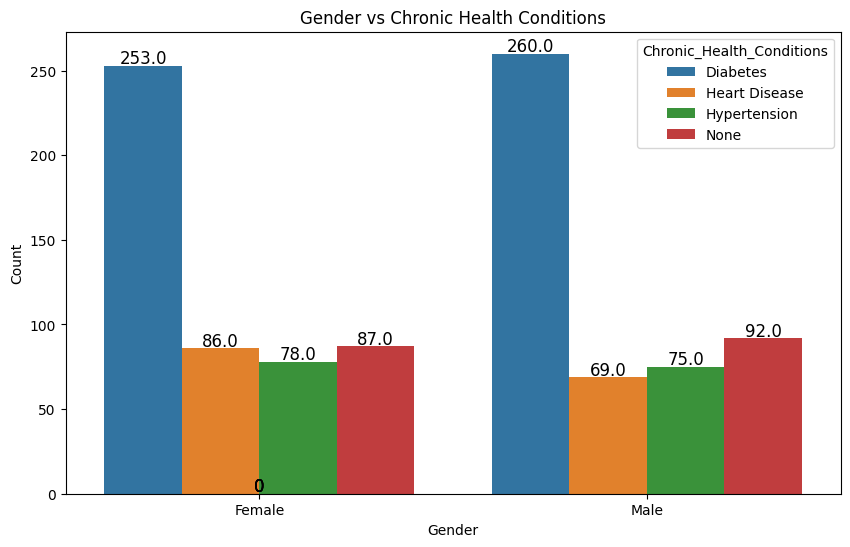

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the number of patients with each gender and chronic health condition
gender_chronic_counts = df.groupby(['Gender', 'Chronic_Health_Conditions']).size().reset_index(name='count')

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='count', hue='Chronic_Health_Conditions', data=gender_chronic_counts)

# Add the count labels on top of the bars
for p in plt.gca().patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(count, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

# Set the title and labels
plt.title('Gender vs Chronic Health Conditions')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()


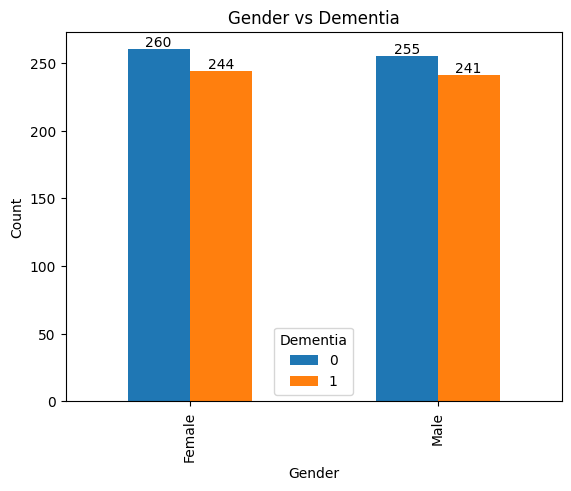

In [ ]:
# Create a crosstab table of gender vs Dementia
crosstab = pd.crosstab(df['Gender'], df['Dementia'])

# Create a bar chart of the crosstab table
fig, ax = plt.subplots()
crosstab.plot(kind='bar', ax=ax)

# Add the number of patients above each bar
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Dementia')
plt.show()


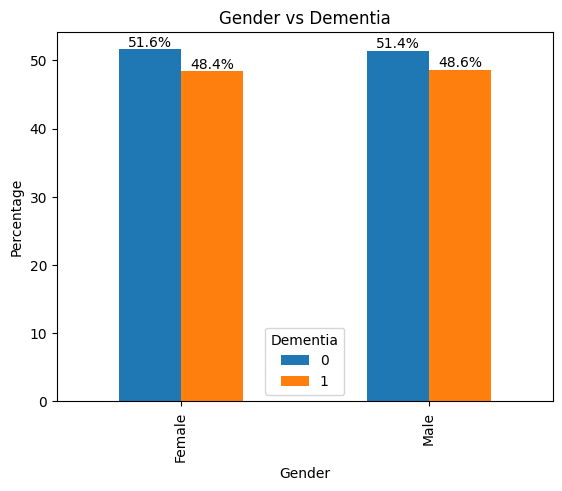

In [ ]:
# Create a crosstab table of gender vs Dementia
crosstab = pd.crosstab(df['Gender'], df['Dementia'])

# Calculate the percentage
crosstab_percent = crosstab.div(crosstab.sum(1), axis=0) * 100

# Create a bar chart of the crosstab table
fig, ax = plt.subplots()
crosstab_percent.plot(kind='bar', ax=ax)

# Add the percentage of patients above each bar
for i in ax.patches:
    # Get the height of the bar
    height = i.get_height()
    # Calculate the percentage
    percentage = '{:.1f}%'.format(height)
    # Annotate the percentage on the bar
    ax.annotate(percentage, (i.get_x() + i.get_width() / 2., height),
                ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender vs Dementia')
plt.show()

In [ ]:
# Total number of male and female in gender feature
gender_counts = df['Gender'].value_counts()
male_count = gender_counts['Male']
female_count = gender_counts['Female']

# Percentage of male and female
male_percent = (male_count / len(df)) * 100
female_percent = (female_count / len(df)) * 100

# Print the results
print(f"Total number of male: {male_count}")
print(f"Total number of female: {female_count}")
print(f"Percentage of male: {male_percent:.2f}%")
print(f"Percentage of female: {female_percent:.2f}%")


Total number of male: 496
Total number of female: 504
Percentage of male: 49.60%
Percentage of female: 50.40%


# ***Data Preprocessing***

In [ ]:
data = df.copy()

In [ ]:
data.head()

Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0         1      0.084974         98         96.230743        36.224852   
1         0      0.016973         78         93.032122        36.183874   
2         0      0.009000         89         93.566504        37.326321   
3         0      0.086437         60         93.906510        37.030620   
4         1      0.150747         67         97.508994        36.062121   

      Weight  MRI_Delay Prescription  Dosage in mg  Age  ...  Smoking_Status  \
0  57.563978  36.421028          NaN      9.213402   60  ...  Current Smoker   
1  56.832335  31.157633  Galantamine     12.000000   61  ...   Former Smoker   
2  59.759066  37.640435          NaN      9.213402   69  ...   Former Smoker   
3  58.266471  50.673992    Donepezil     23.000000   78  ...    Never Smoked   
4  67.705027  27.810601    Memantine     20.000000   77  ...    Never Smoked   

    APOE_ε4  Physical_Activity Depression_Status Cognitive_Test_Scores  \
0  Negative          Sedentary                No                    10   
1  Positive  Moderate Activity                No                     1   
2  Negative  Moderate Activity                No                     8   
3  Negative      Mild Activity               Yes                     5   
4  Positive      Mild Activity                No                     0   

  Medication_History      Nutrition_Diet Sleep_Quality  \
0                 No       Low-Carb Diet          Poor   
1                Yes       Low-Carb Diet          Poor   
2                 No  Mediterranean Diet          Poor   
3                Yes       Balanced Diet          Poor   
4                Yes       Low-Carb Diet          Good   

   Chronic_Health_Conditions Dementia  
0                   Diabetes        0  
1              Heart Disease        1  
2              Heart Disease        0  
3               Hypertension        1  
4                   Diabetes        1  

[5 rows x 24 columns]

In [ ]:
# check null values
data.isnull().any()

Diabetic                     False
AlcoholLevel                 False
HeartRate                    False
BloodOxygenLevel             False
BodyTemperature              False
Weight                       False
MRI_Delay                    False
Prescription                  True
Dosage in mg                 False
Age                          False
Education_Level              False
Dominant_Hand                False
Gender                       False
Family_History               False
Smoking_Status               False
APOE_ε4                      False
Physical_Activity            False
Depression_Status            False
Cognitive_Test_Scores        False
Medication_History           False
Nutrition_Diet               False
Sleep_Quality                False
Chronic_Health_Conditions    False
Dementia                     False
dtype: bool

In [ ]:
categorical_columns = ["Prescription","Education_Level","Dominant_Hand", "Gender", "Family_History", "Smoking_Status", "APOE_ε4", "Medication_History", "Nutrition_Diet", "Sleep_Quality", "Chronic_Health_Conditions", "Physical_Activity", "Depression_Status"]

for i in categorical_columns:
    print(data[i].unique())

[nan 'Galantamine' 'Donepezil' 'Memantine' 'Rivastigmine']
['Primary School' 'Secondary School' 'No School' 'Diploma/Degree']
['Left' 'Right']
['Female' 'Male']
['No' 'Yes']
['Current Smoker' 'Former Smoker' 'Never Smoked']
['Negative' 'Positive']
['No' 'Yes']
['Low-Carb Diet' 'Mediterranean Diet' 'Balanced Diet']
['Poor' 'Good']
['Diabetes' 'Heart Disease' 'Hypertension' 'None']
['Sedentary' 'Moderate Activity' 'Mild Activity']
['No' 'Yes']


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in categorical_columns:
    data[i] = encoder.fit_transform(df[i])

In [ ]:
data['Prescription'].fillna(data['Prescription'].mean(), inplace=True)

In [ ]:
data.isnull().any()

Diabetic                     False
AlcoholLevel                 False
HeartRate                    False
BloodOxygenLevel             False
BodyTemperature              False
Weight                       False
MRI_Delay                    False
Prescription                 False
Dosage in mg                 False
Age                          False
Education_Level              False
Dominant_Hand                False
Gender                       False
Family_History               False
Smoking_Status               False
APOE_ε4                      False
Physical_Activity            False
Depression_Status            False
Cognitive_Test_Scores        False
Medication_History           False
Nutrition_Diet               False
Sleep_Quality                False
Chronic_Health_Conditions    False
Dementia                     False
dtype: bool

<Axes: >

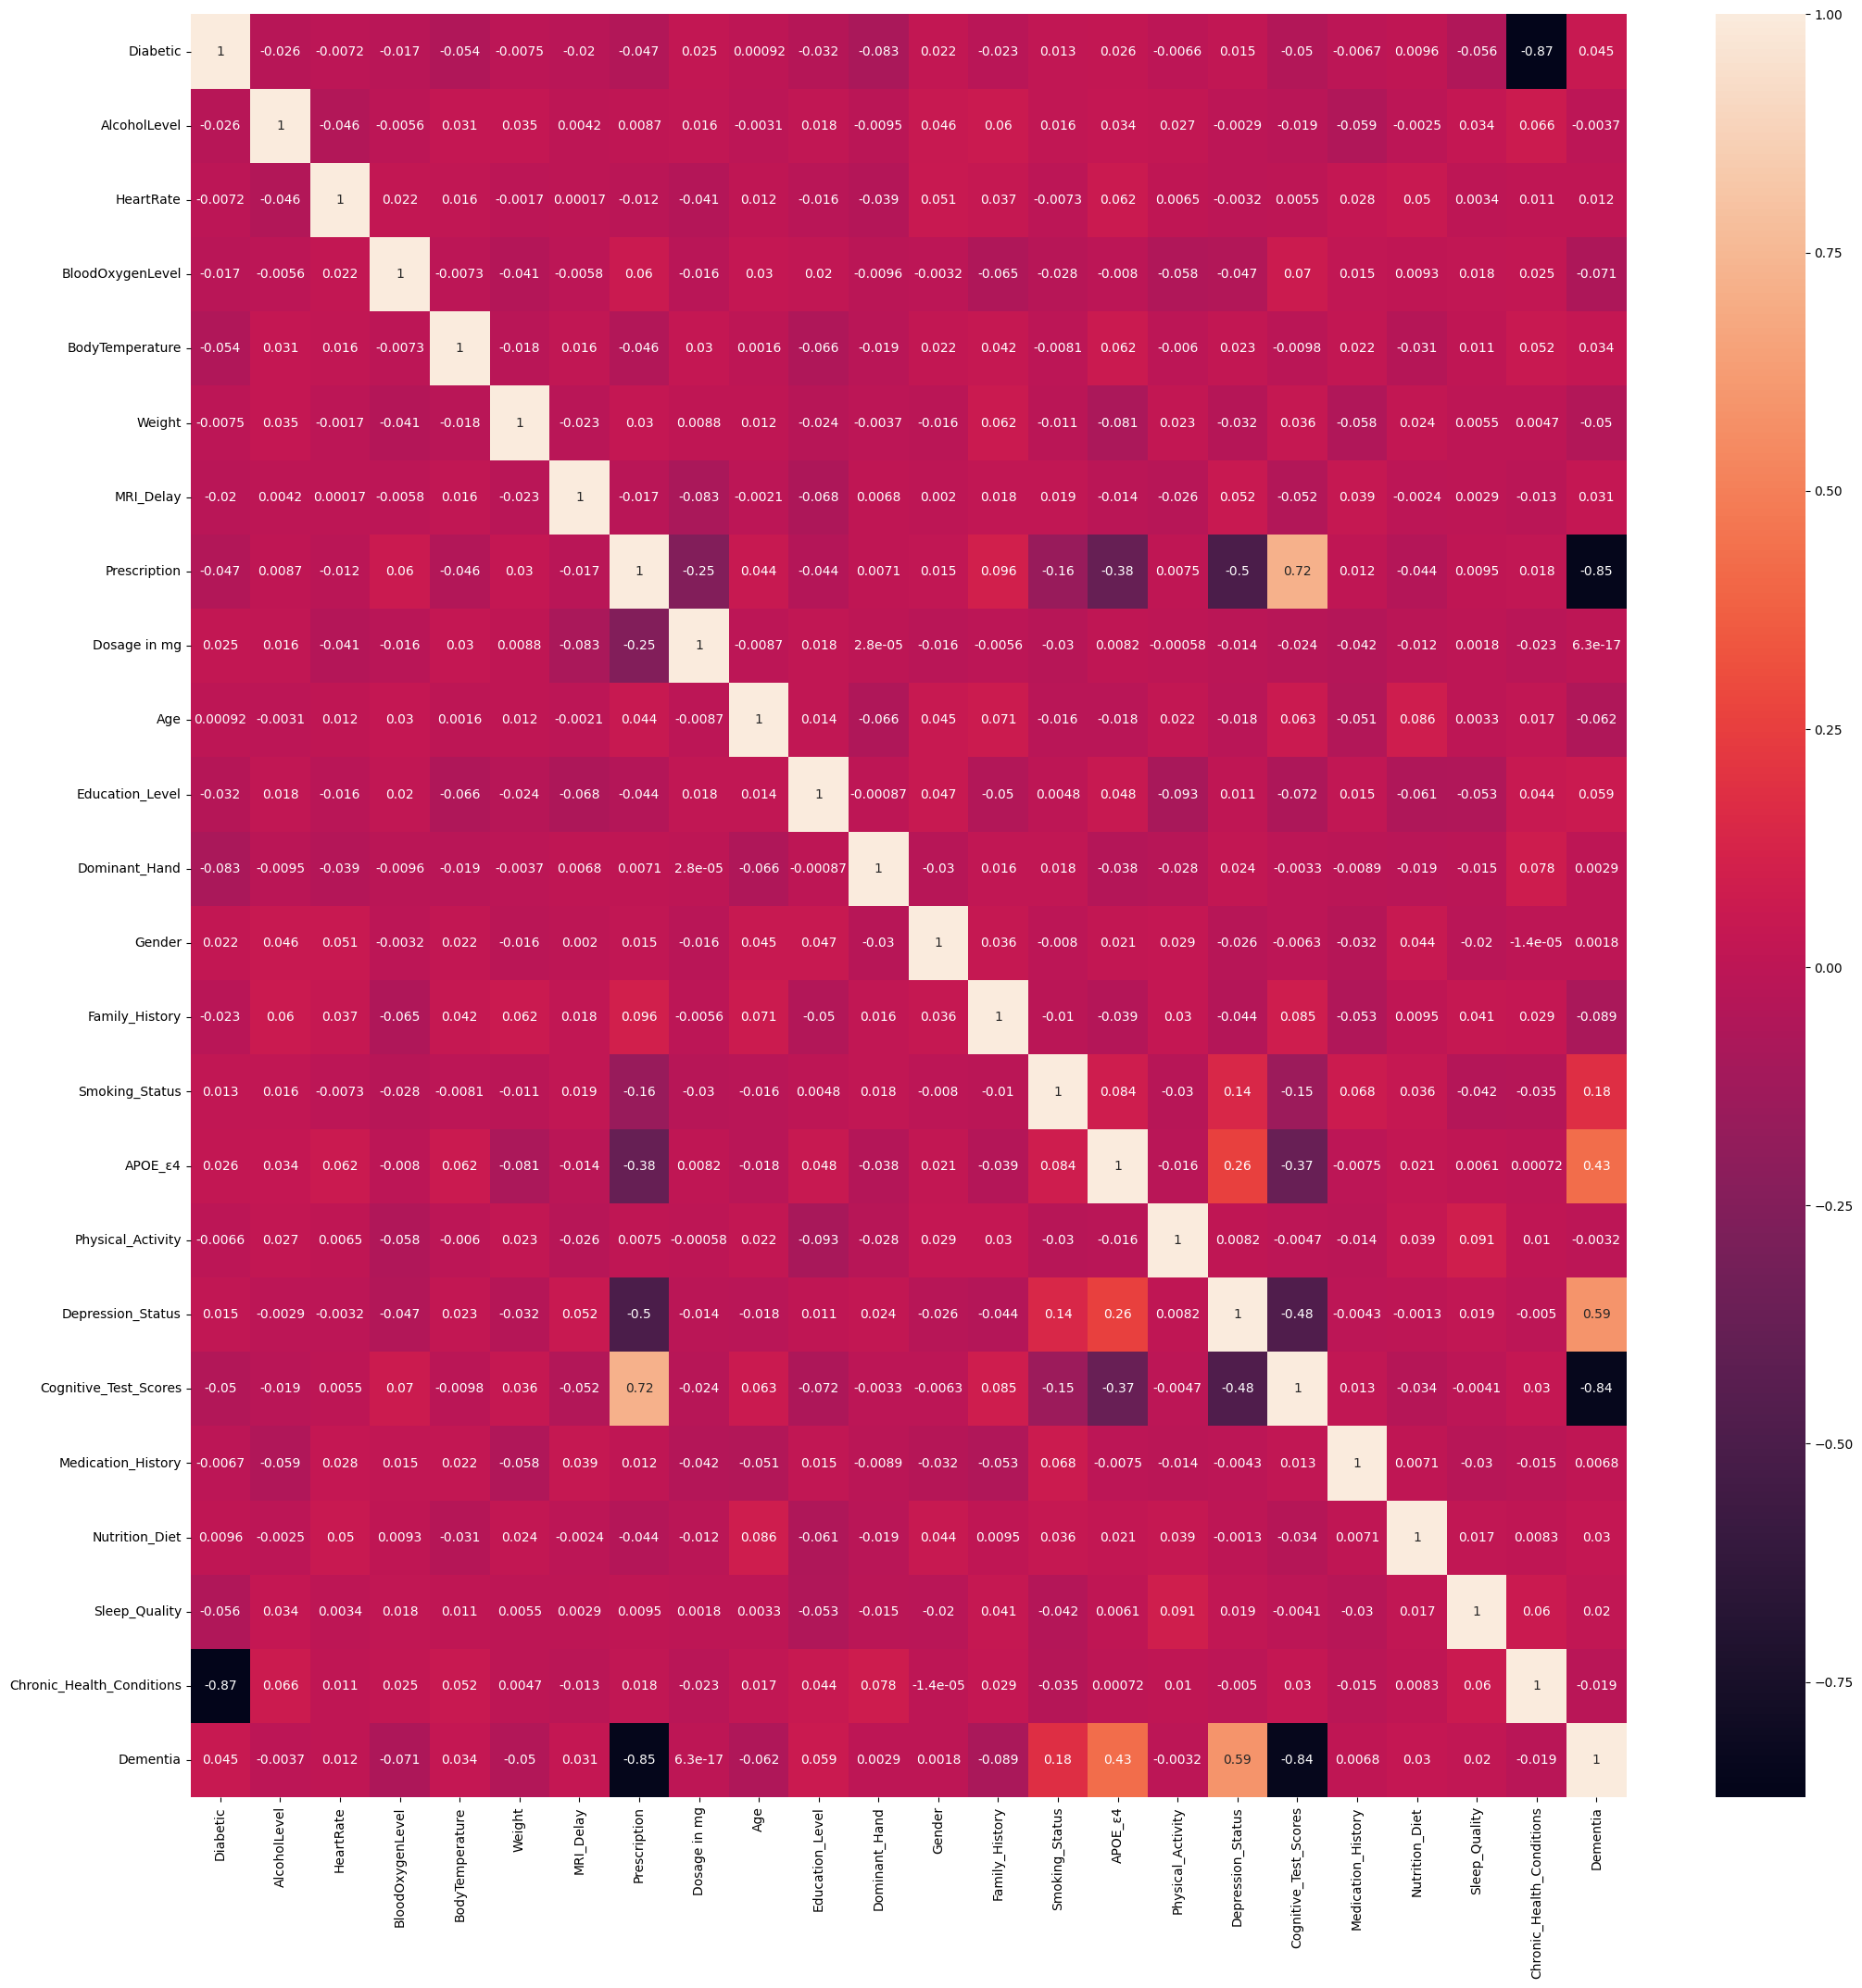

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numerical_columns = ["AlcoholLevel", "HeartRate", "BloodOxygenLevel", "BodyTemperature", "Weight", "MRI_Delay", "Dosage in mg", "Age", "Cognitive_Test_Scores"]

scaler = StandardScaler()

# Convert non-numeric values to NaN
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Now, handle missing values (you can use other imputation methods if needed)
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Apply StandardScaler
for col in numerical_columns:
    data[col] = scaler.fit_transform(np.array(data[col]).reshape(-1, 1))

In [ ]:
data.shape

(1000, 24)

# ***TrainTest***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data.columns

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

In [ ]:
X = data.drop(columns='Dementia', axis=1)
y = data['Dementia']

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (800, 23)
X_test shape: (200, 23)
y_train shape: (800, 1)
y_test shape: (200, 1)


In [ ]:
data.shape

(1000, 24)

In [ ]:
class_counts = y.value_counts()
print(class_counts)

0    515
1    485
Name: Dementia, dtype: int64


In [ ]:
# For numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64'])
print(numerical_features.describe())

          Diabetic  AlcoholLevel     HeartRate  BloodOxygenLevel  \
count  1000.000000  1.000000e+03  1.000000e+03      1.000000e+03   
mean      0.513000  4.263256e-17  3.694822e-16      1.614708e-15   
std       0.500081  1.000500e+00  1.000500e+00      1.000500e+00   
min       0.000000 -1.670179e+00 -1.601702e+00     -1.781330e+00   
25%       0.000000 -9.018290e-01 -9.406272e-01     -8.030045e-01   
50%       1.000000 -3.317024e-03 -3.164897e-02      5.614099e-02   
75%       1.000000  9.101075e-01  8.773292e-01      8.740565e-01   
max       1.000000  1.728480e+00  1.703673e+00      1.630297e+00   

       BodyTemperature        Weight     MRI_Delay  Prescription  \
count     1.000000e+03  1.000000e+03  1.000000e+03   1000.000000   
mean      6.188827e-15  1.936229e-16  3.552714e-17      2.798000   
std       1.000500e+00  1.000500e+00  1.000500e+00      1.456474   
min      -1.759979e+00 -1.677553e+00 -1.780548e+00      0.000000   
25%      -8.485812e-01 -8.946812e-01 -8.227372e

In [ ]:
# Print the count of each unique value for each feature
for column in X.columns:
    print(X[column].value_counts())

1    513
0    487
Name: Diabetic, dtype: int64
-0.229285    1
-1.182456    1
 0.819525    1
 1.710261    1
-0.104452    1
            ..
 1.545836    1
 1.251177    1
 0.156608    1
-0.451276    1
-0.212317    1
Name: AlcoholLevel, Length: 1000, dtype: int64
-1.601702    32
-0.692724    31
 0.877329    31
 1.125232    31
 1.621039    31
-1.353799    30
-1.023262    29
-0.444821    28
-1.188530    28
-0.940627    28
-1.105896    28
 0.133620    28
-0.031649    27
-1.436433    27
 0.629426    26
 1.042598    26
-1.271165    26
 0.381523    25
 1.207867    25
-1.519068    25
 1.455770    24
-0.114283    24
-0.857993    24
 0.794695    24
-0.610090    24
 0.216254    23
 1.290501    23
-0.362186    22
 1.538404    21
 0.959964    21
 0.050985    20
-0.527455    20
 0.298889    20
 1.703673    20
 0.546792    20
-0.775358    19
 0.712060    19
-0.196918    19
-0.279552    18
 1.373136    17
 0.464157    16
Name: HeartRate, dtype: int64
 0.343156    1
 0.249128    1
-0.926798    1
 1.062841 

# ***Test***

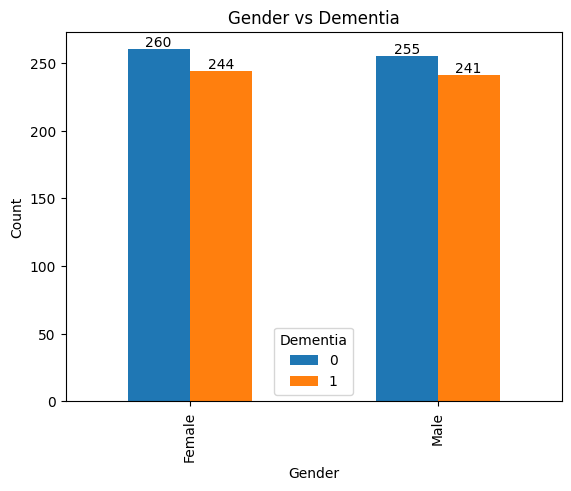

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab table of gender vs Dementia
crosstab = pd.crosstab(df['Gender'], df['Dementia'])

# Create a bar chart of the crosstab table
fig, ax = plt.subplots()
crosstab.plot(kind='bar', ax=ax)

# Add the number of patients above each bar
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Dementia')
plt.show()


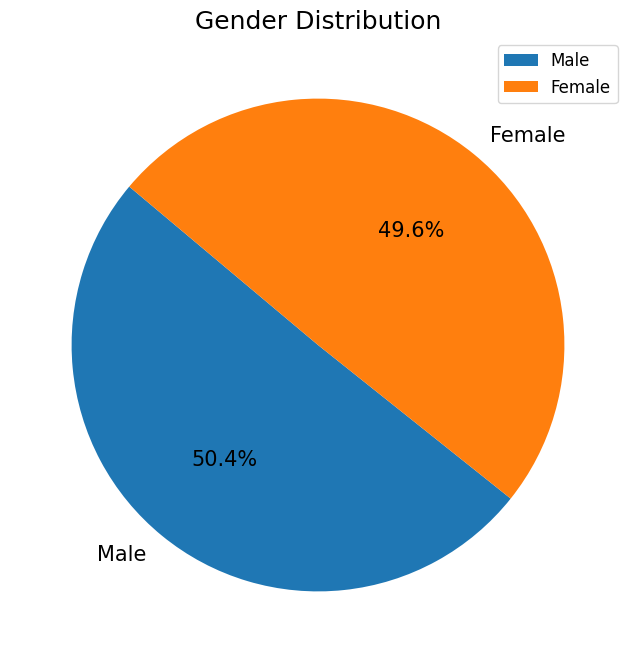

In [ ]:
import matplotlib.pyplot as plt
# Create a pie chart to visualize the number of male and female
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 15})
plt.title('Gender Distribution', fontsize=18)
# Increase the font size of labels
plt.legend(fontsize=12)
plt.show()


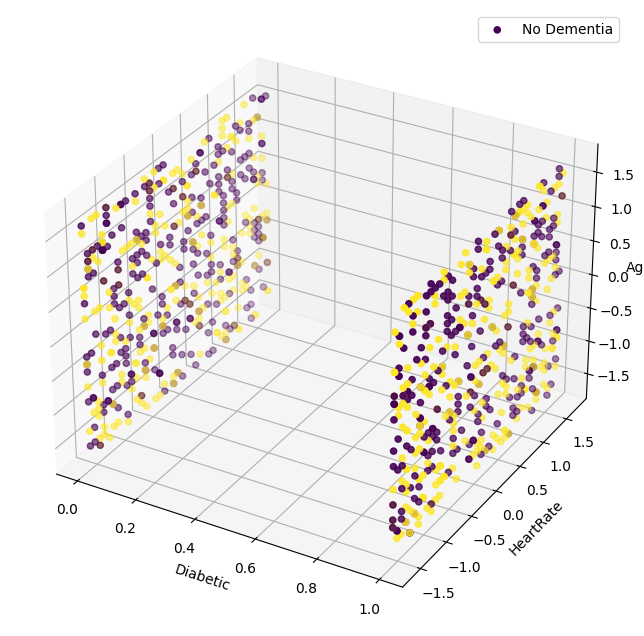

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Select three features for the 3D plot
features = ['Diabetic', 'HeartRate', 'Age']

# Scatter plot of the selected features
ax.scatter(X[features[0]], X[features[1]], X[features[2]], c=y, cmap='viridis')

# Set axis labels and title
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2], labelpad=.01)
#ax.set_title('3D Visualization of Dementia Dataset')

# Add a legend for the target variable
plt.legend(['No Dementia', 'Dementia'])

# Display the plot
plt.show()


# ***Dataset Validation***

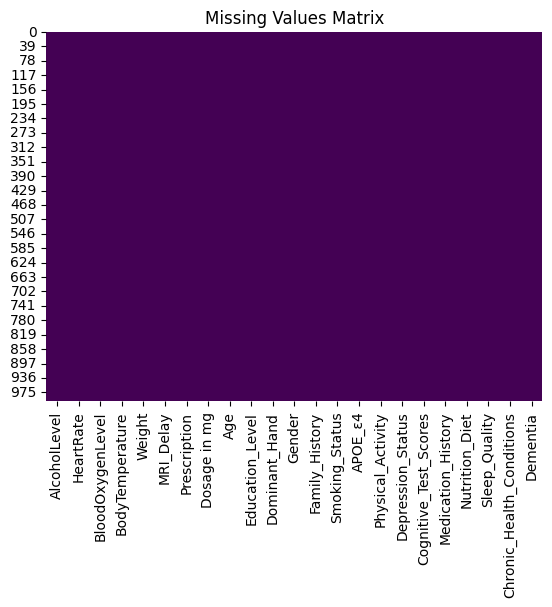

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Matrix')
plt.show()

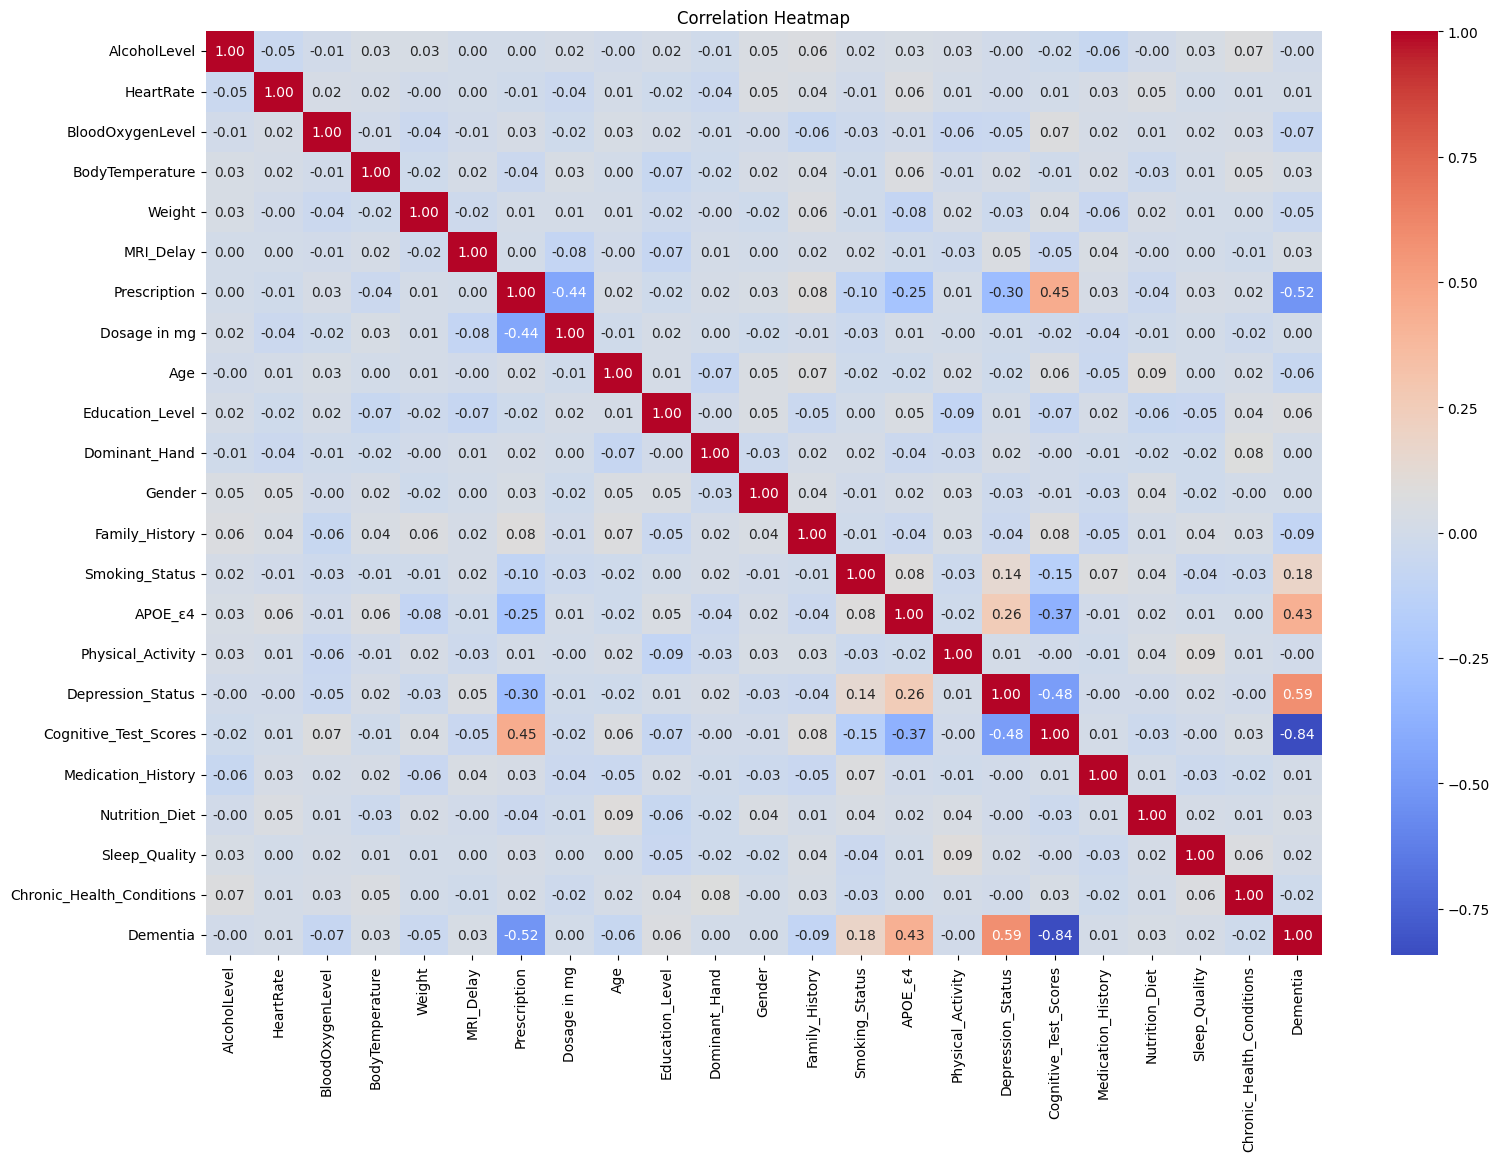

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

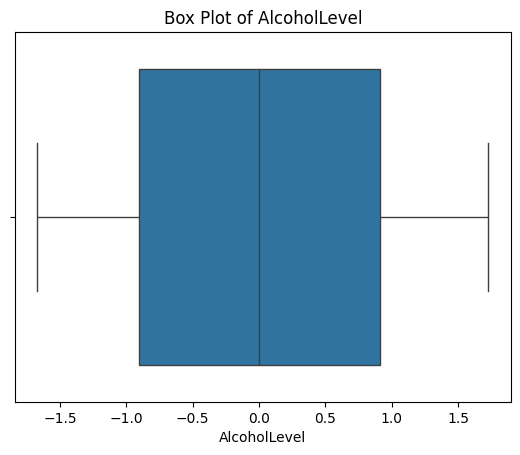

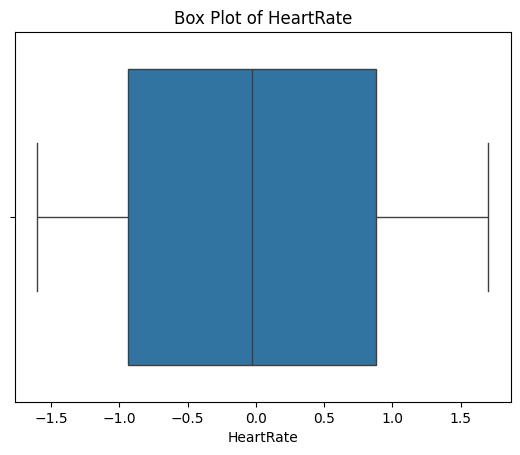

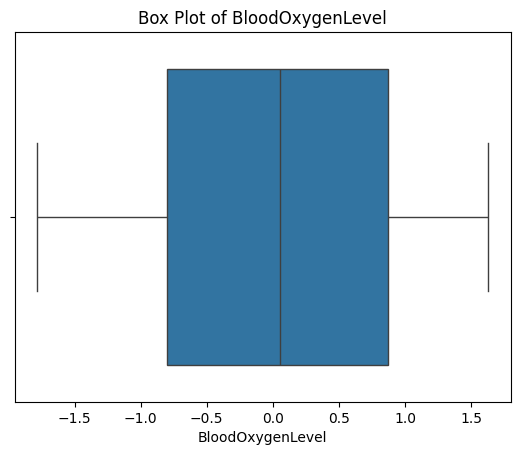

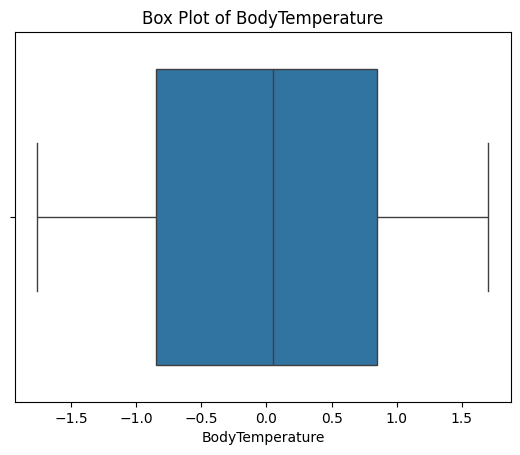

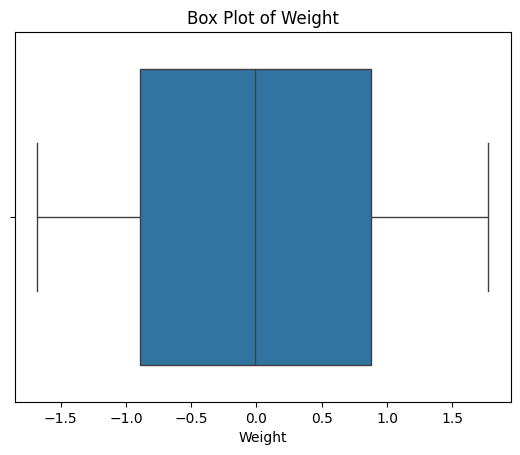

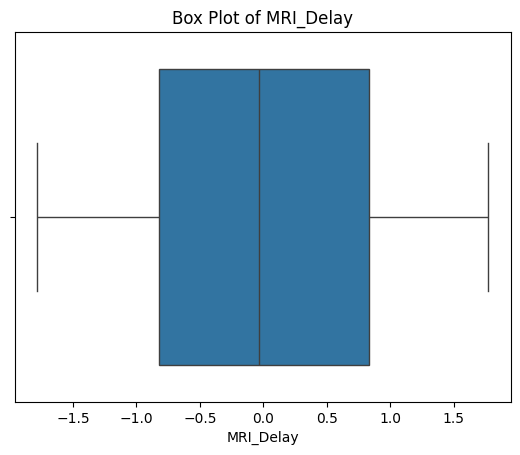

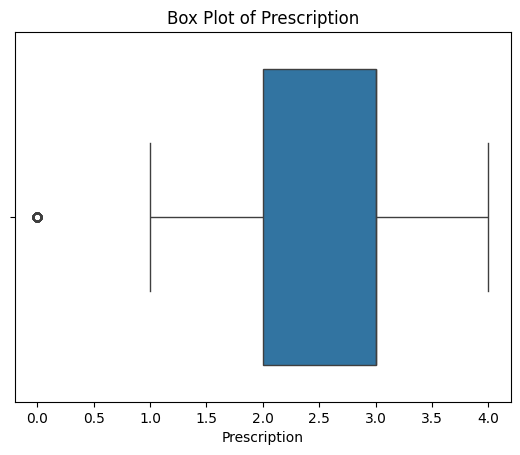

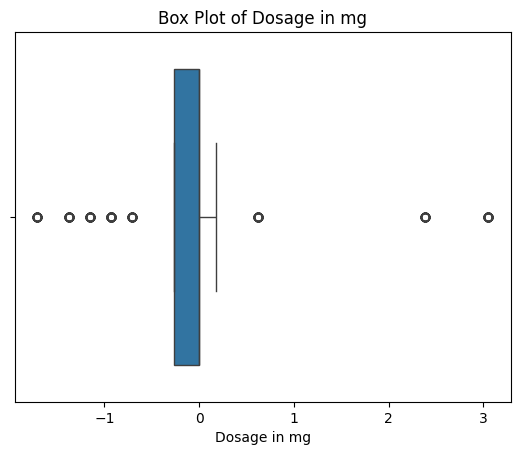

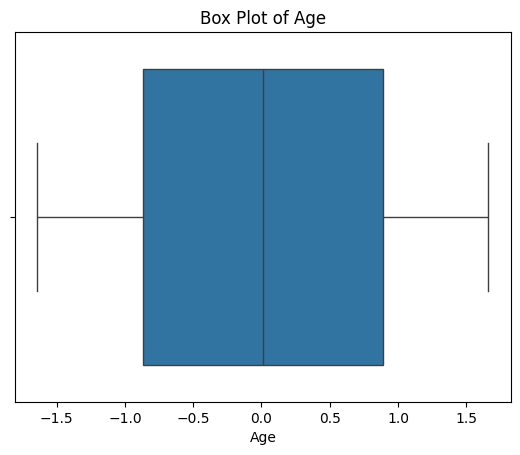

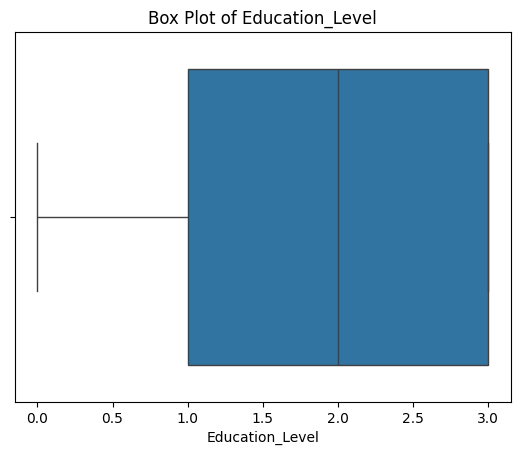

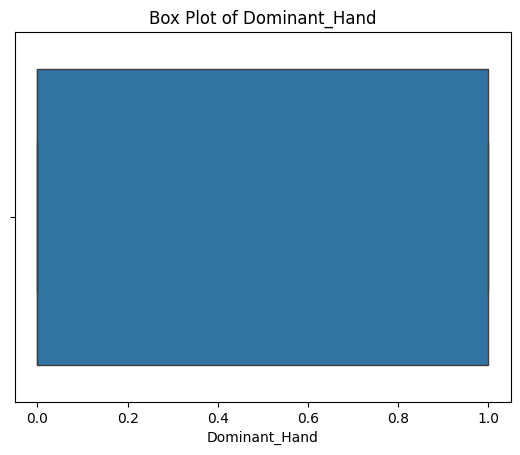

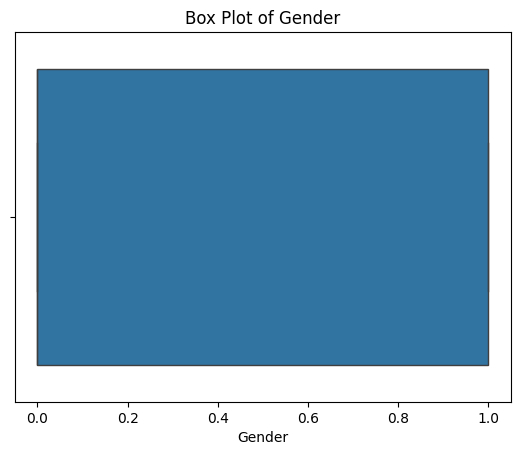

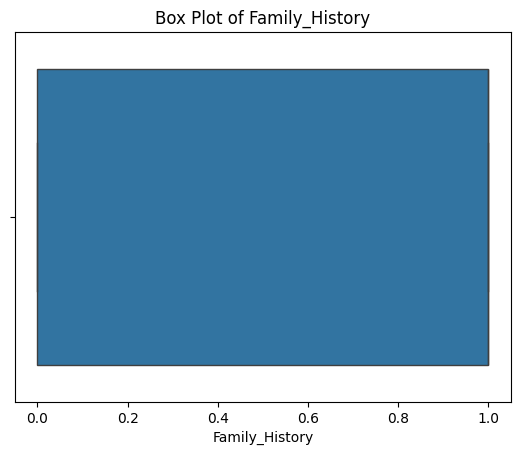

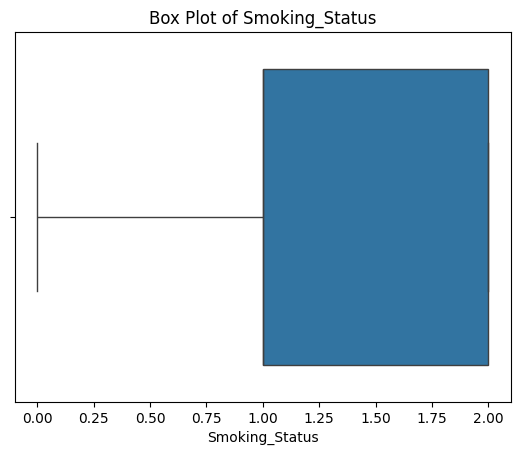

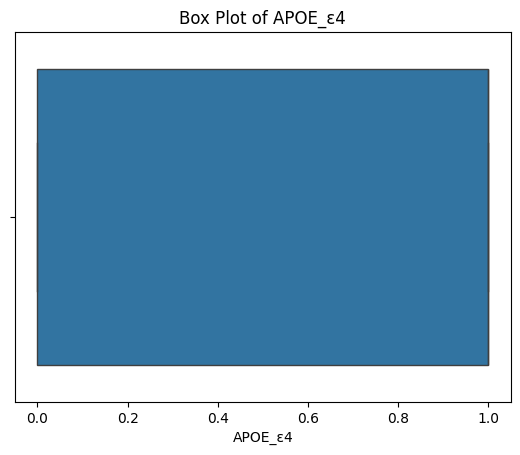

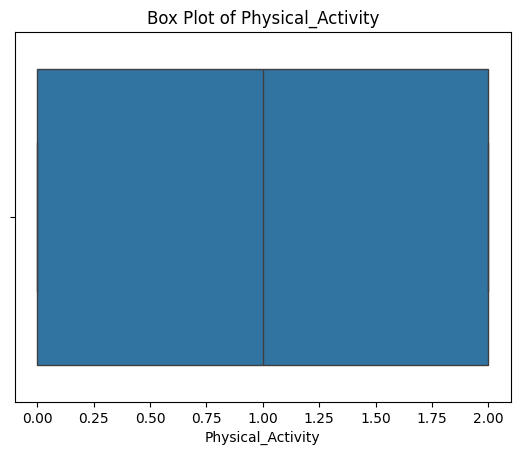

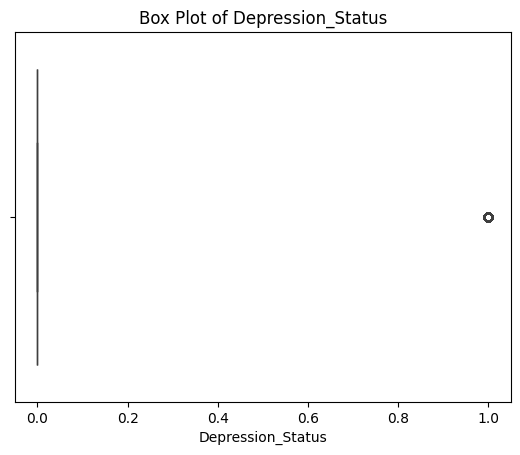

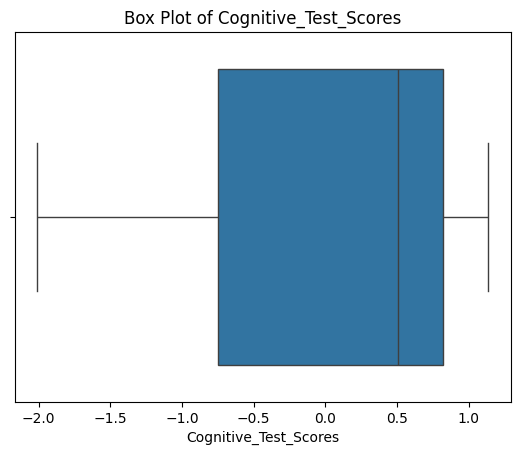

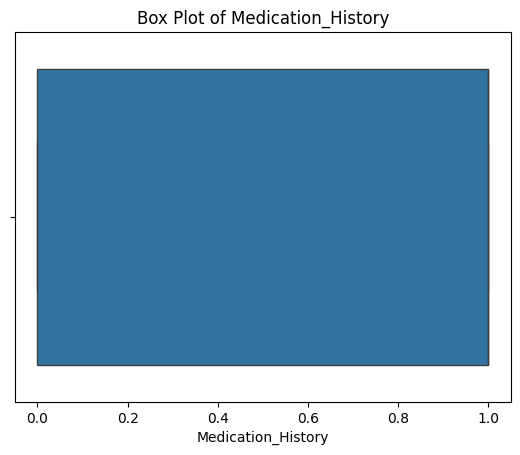

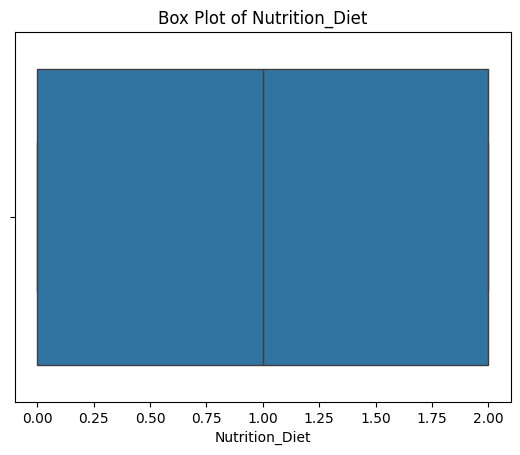

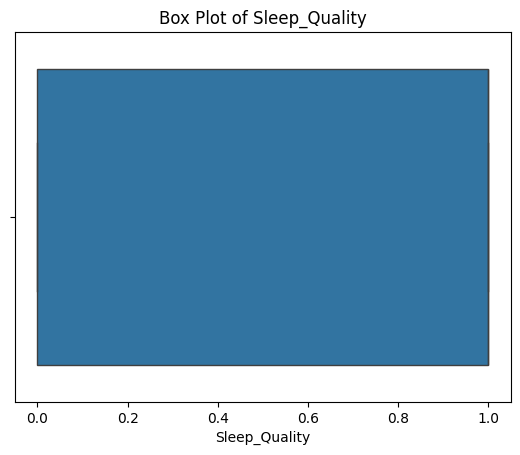

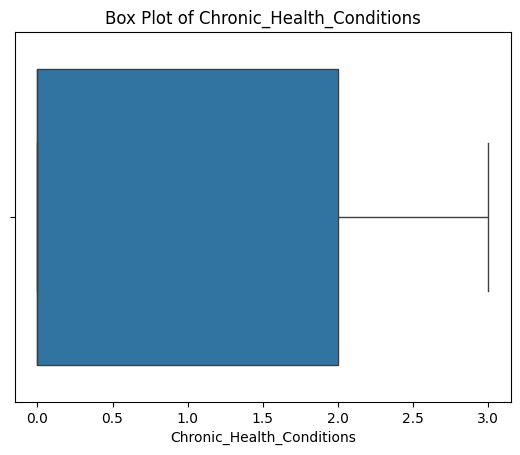

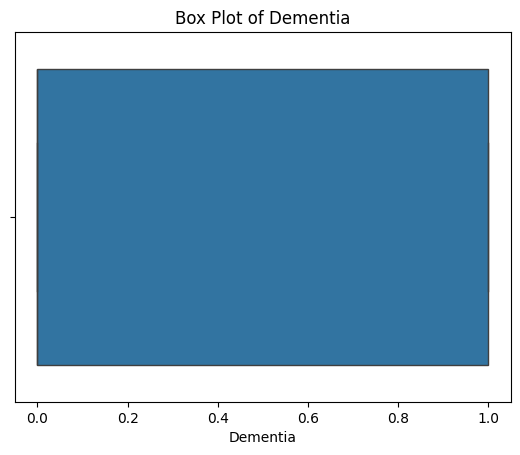

In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

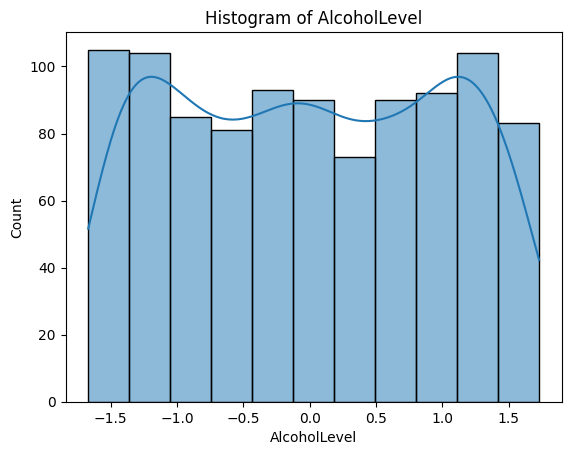

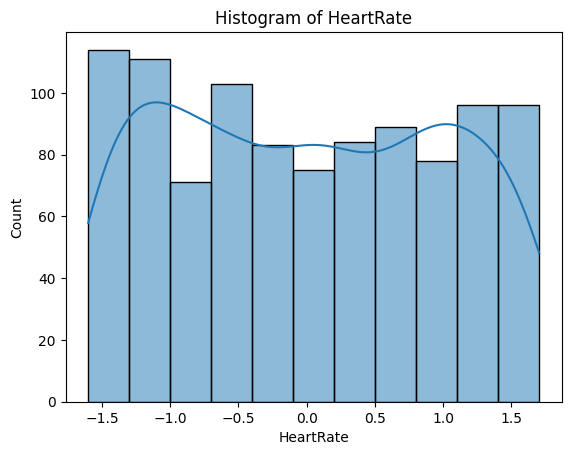

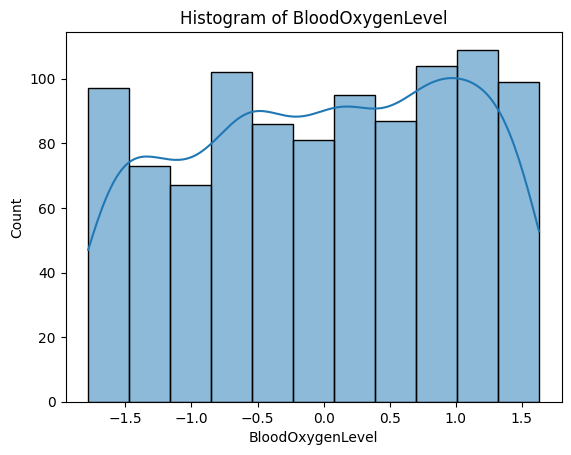

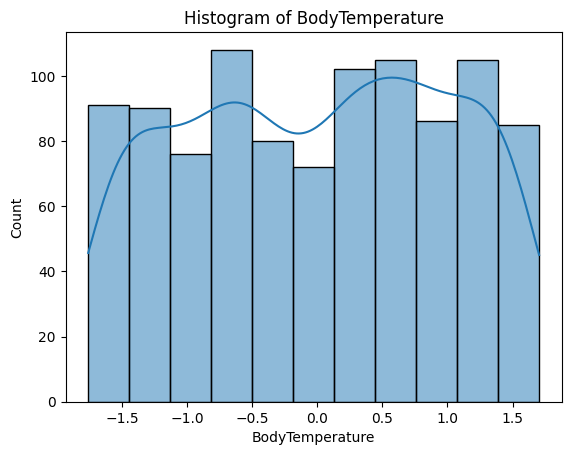

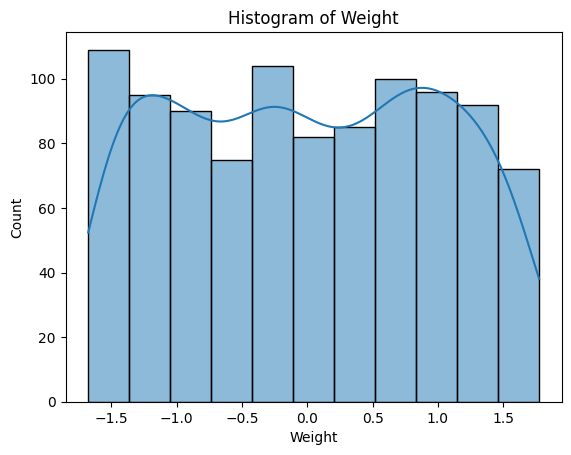

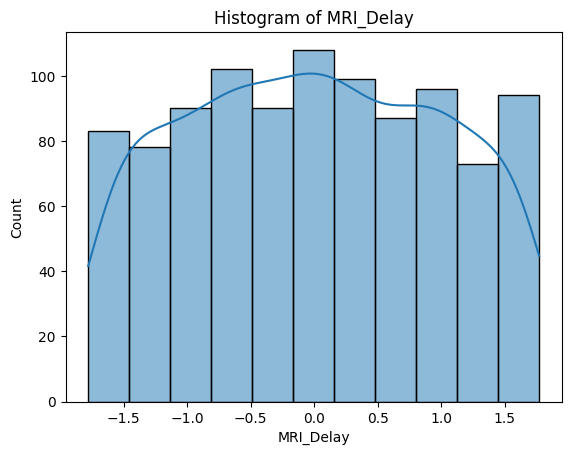

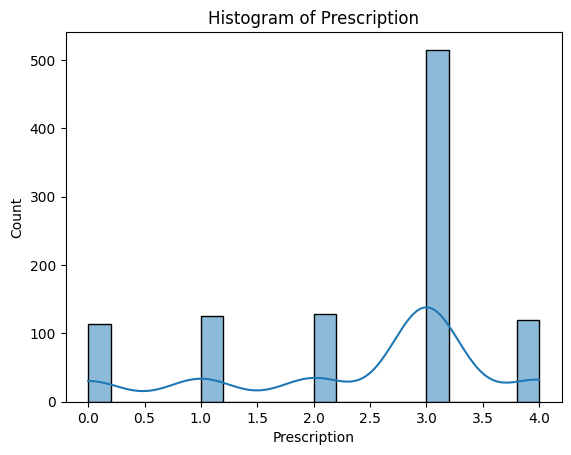

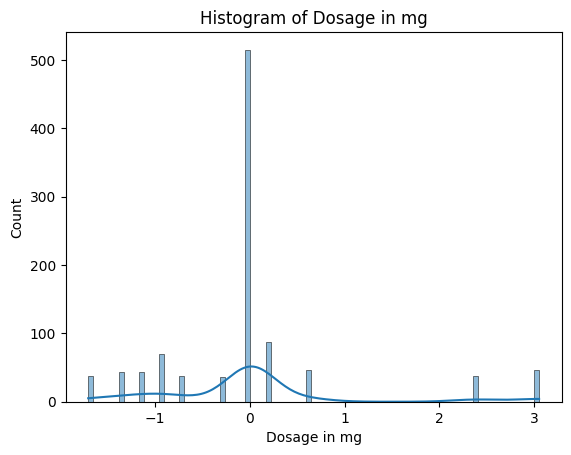

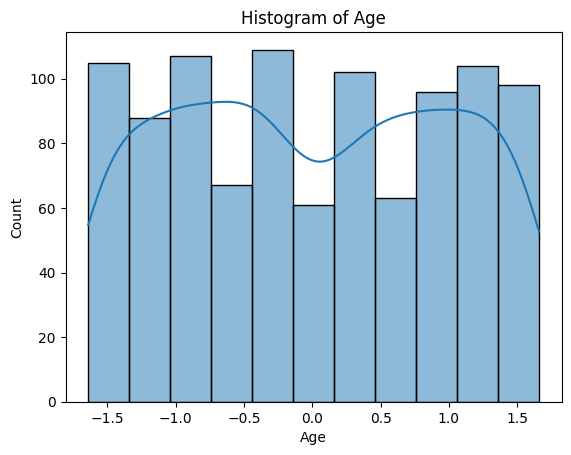

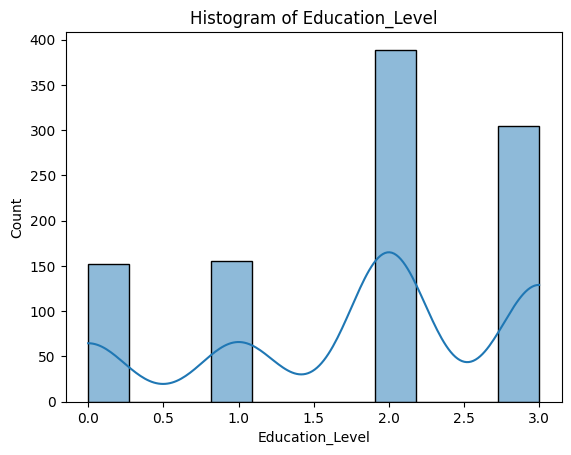

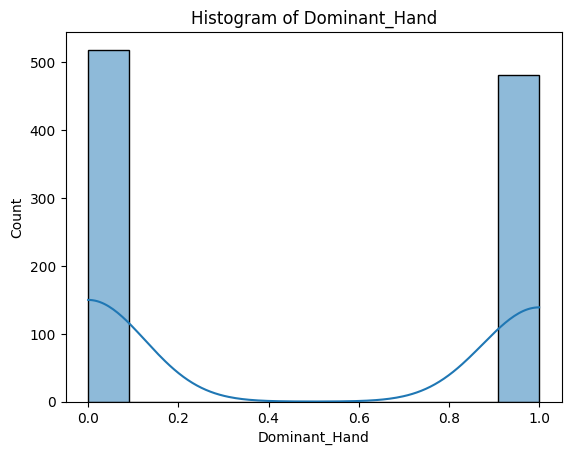

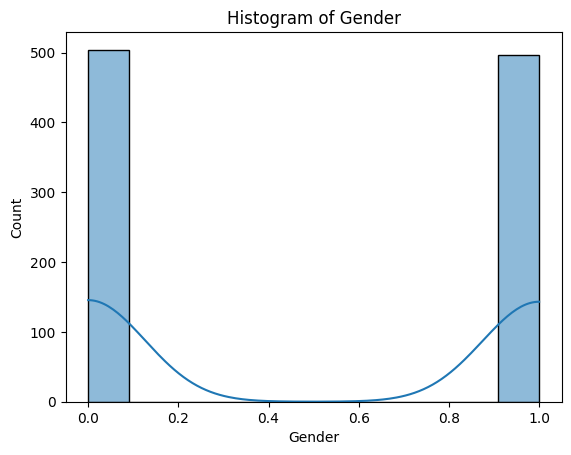

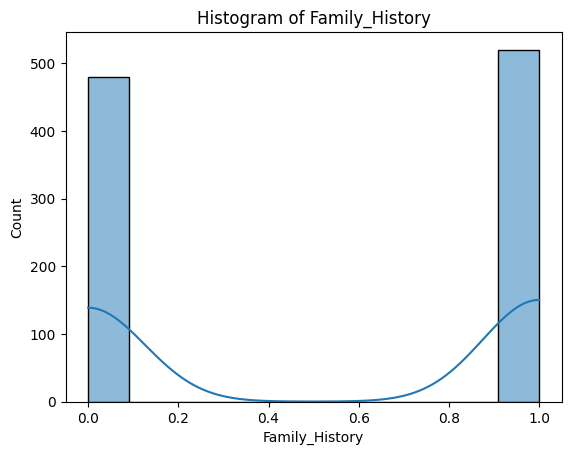

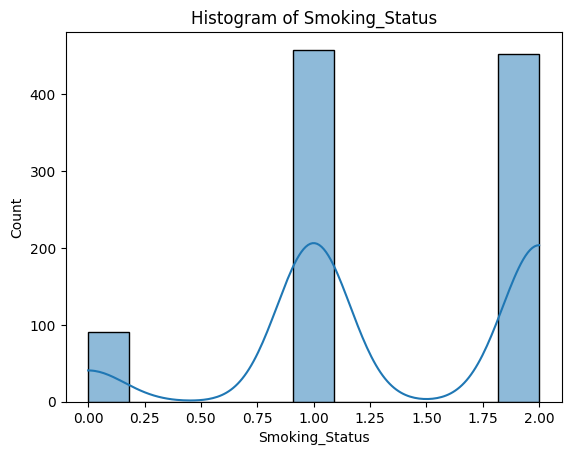

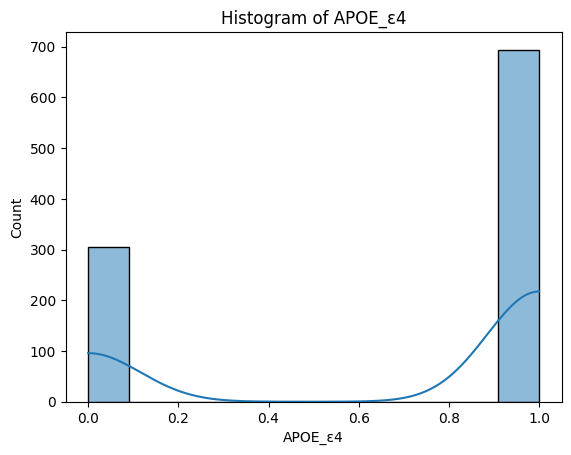

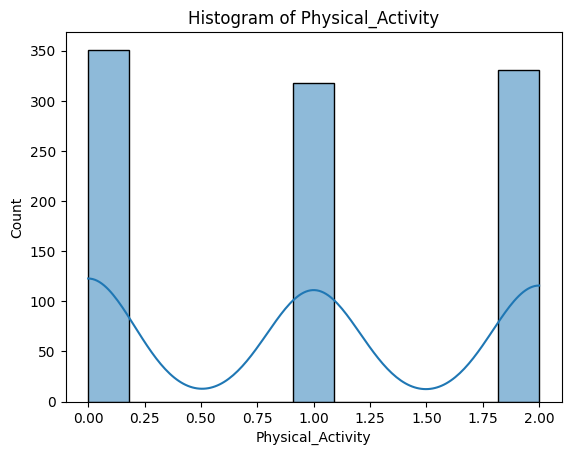

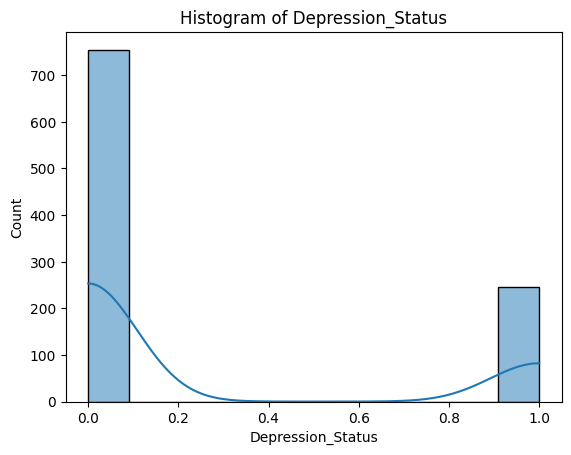

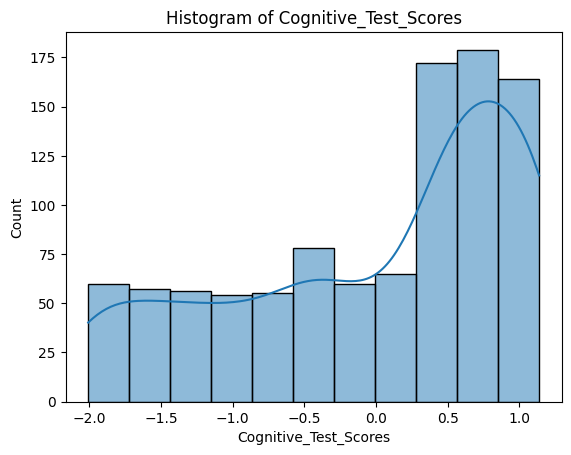

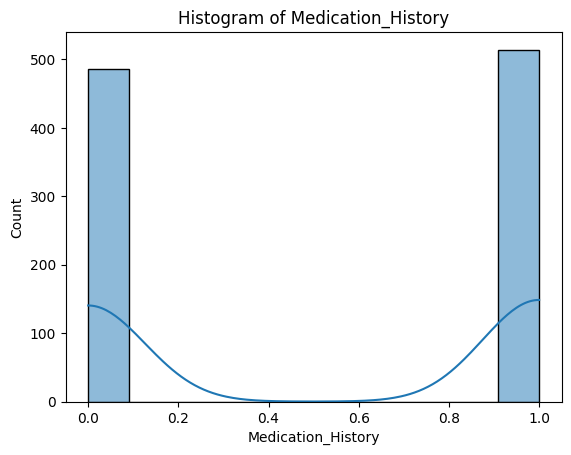

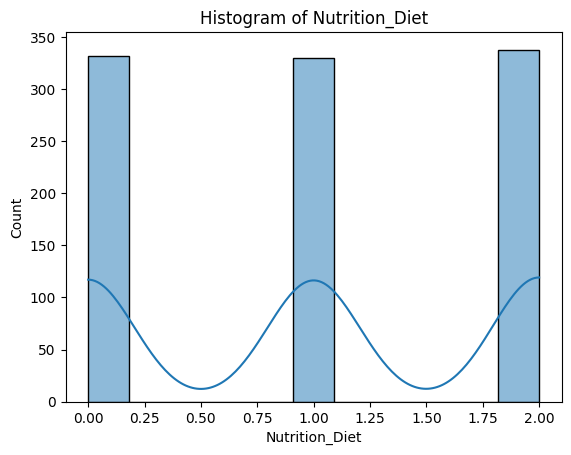

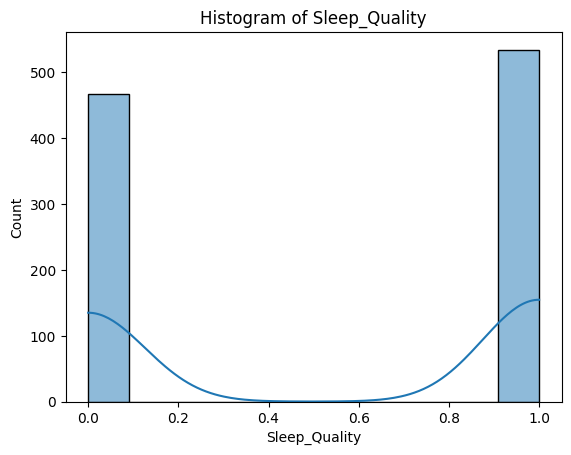

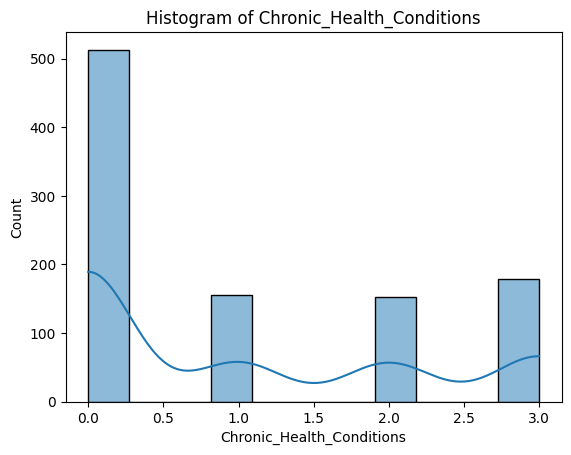

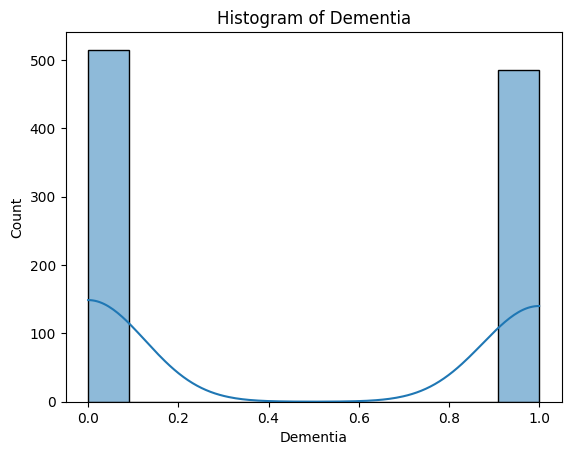

In [ ]:
for column in numerical_columns:
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [ ]:
categorical_columns = data.select_dtypes(include='object').columns
for column in categorical_columns:
    sns.countplot(x=data[column])
    plt.title(f'Count Plot of {column}')
    plt.show()

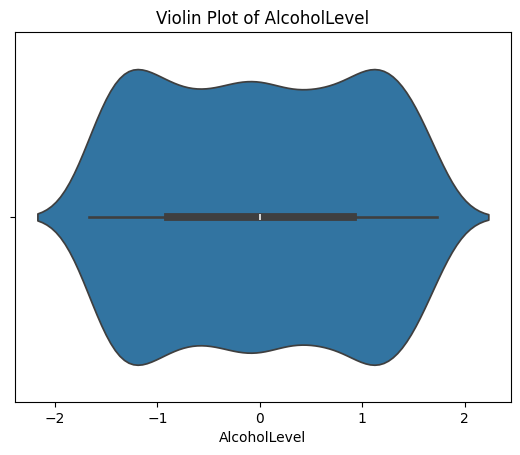

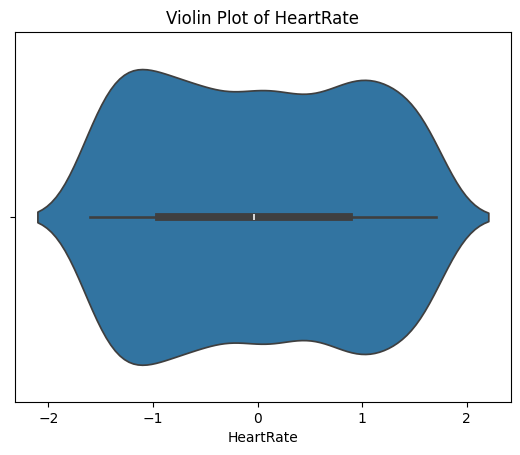

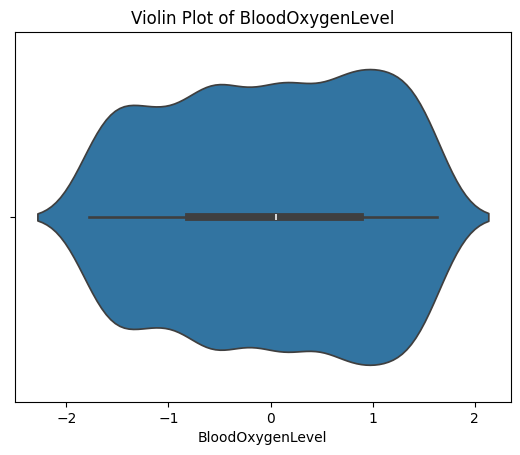

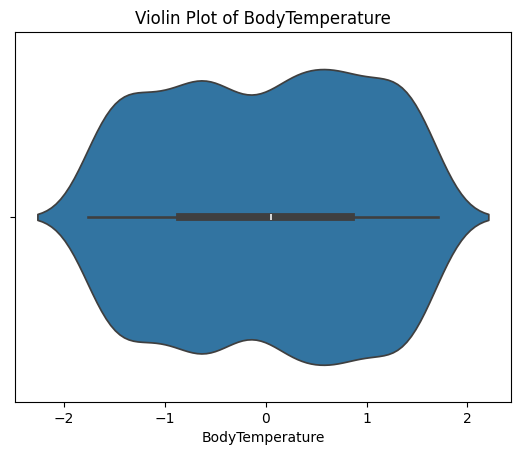

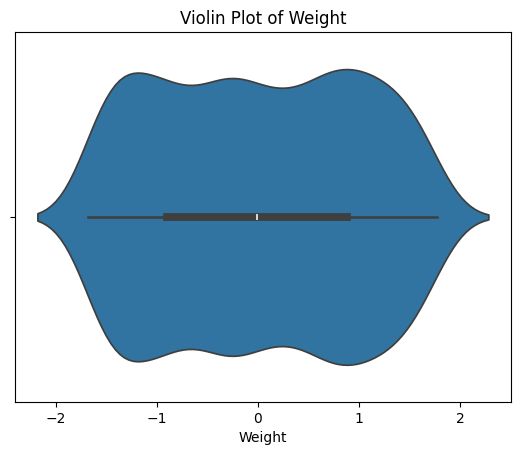

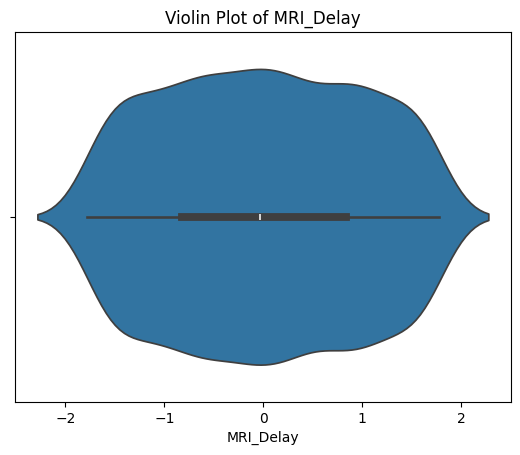

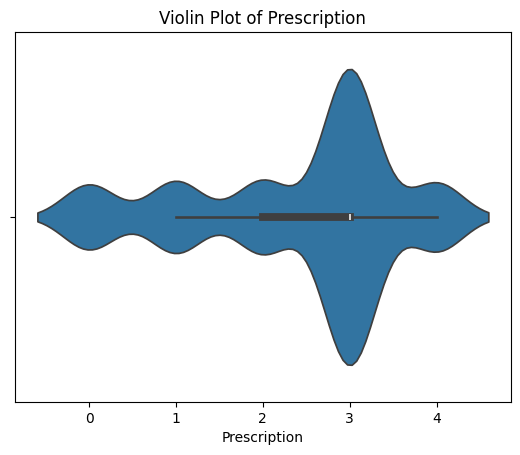

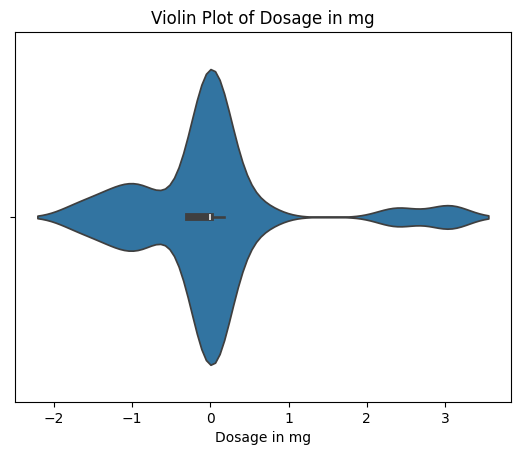

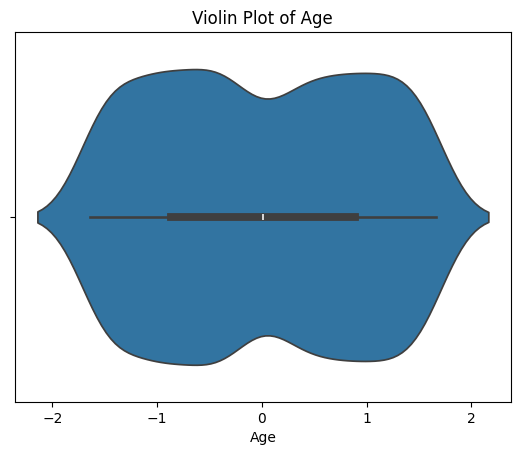

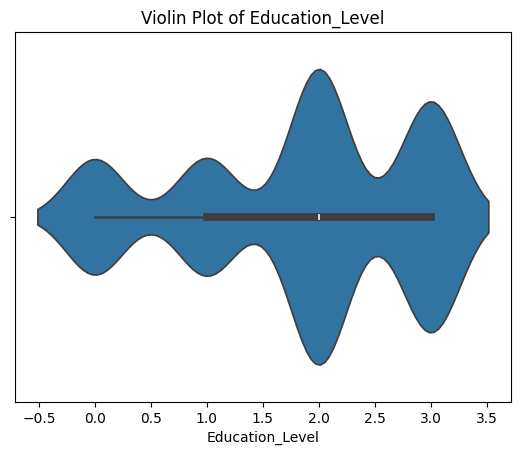

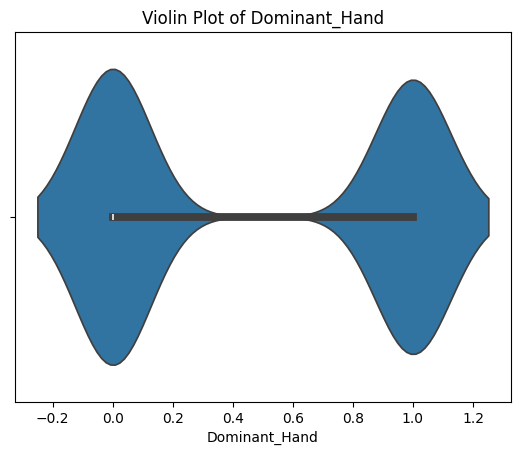

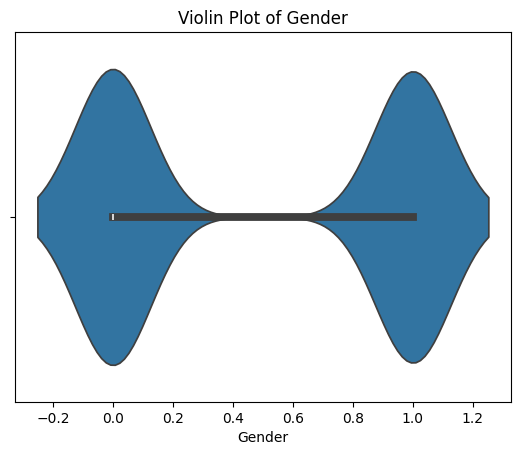

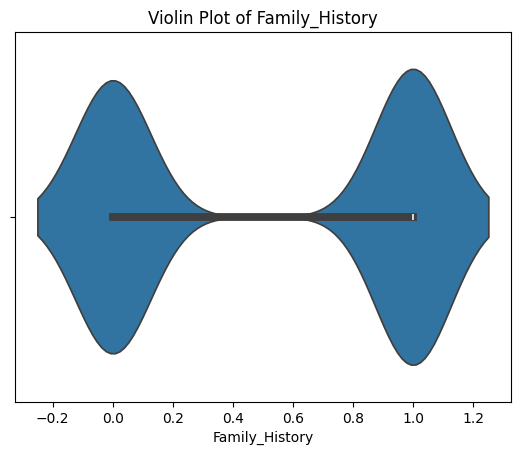

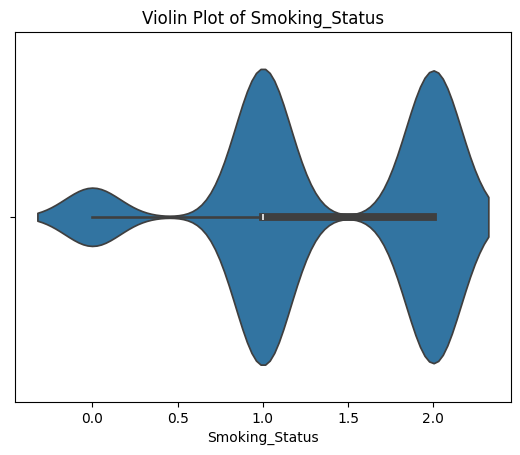

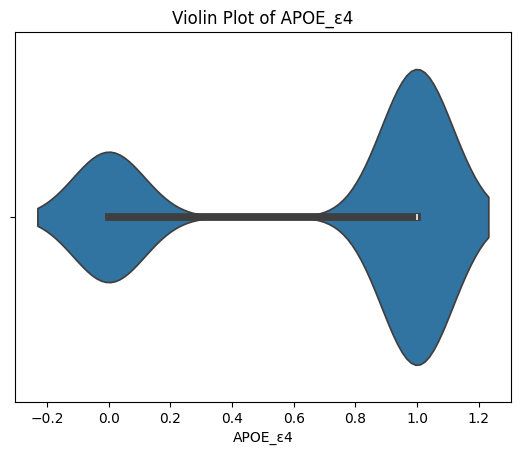

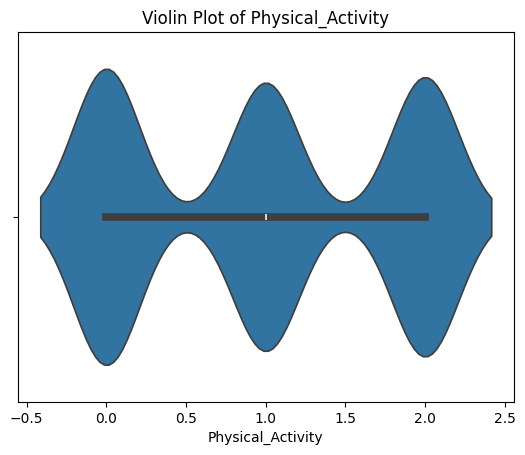

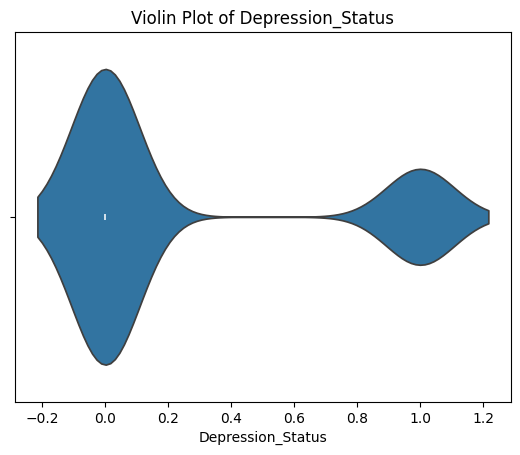

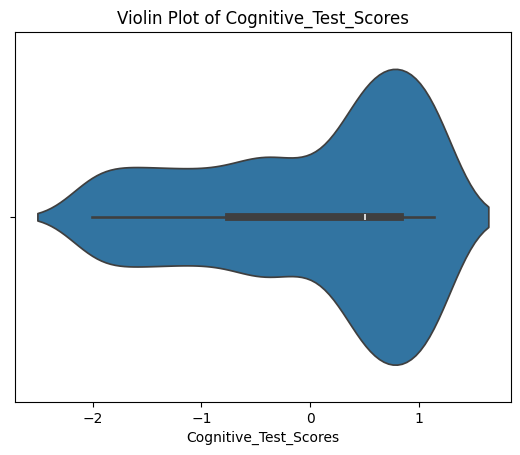

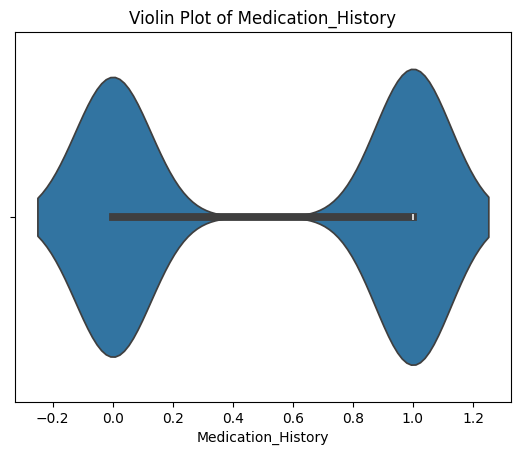

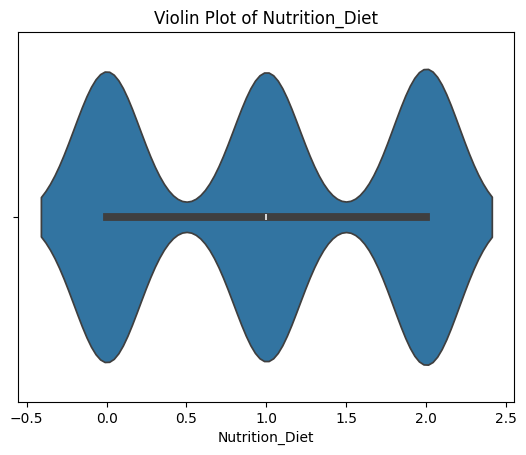

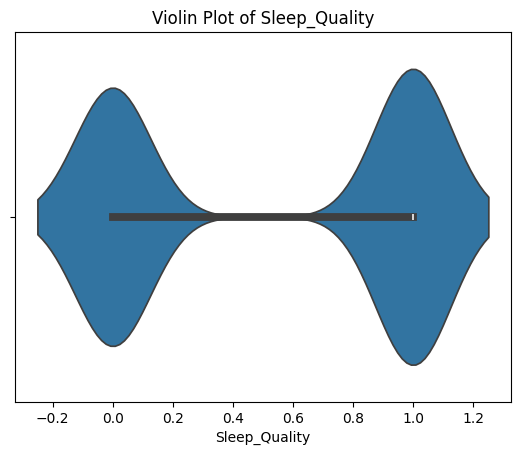

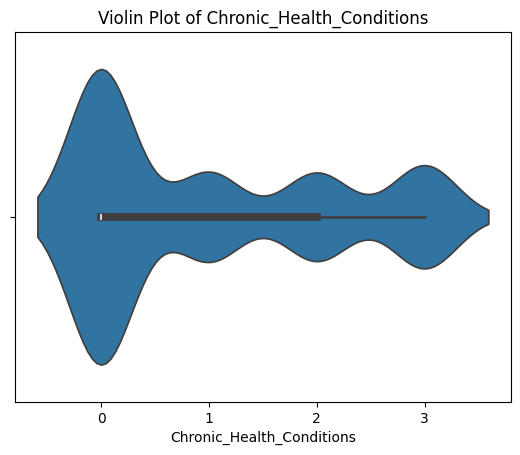

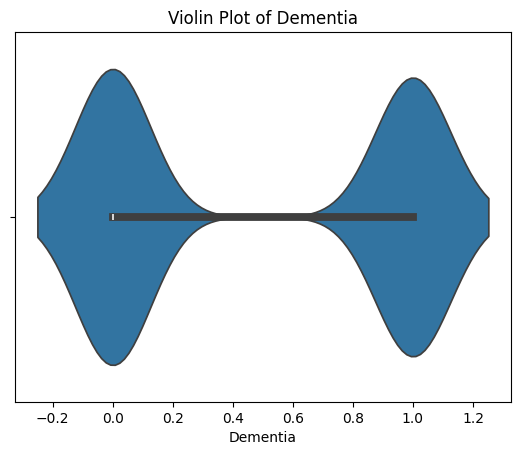

In [ ]:
for column in numerical_columns:
    sns.violinplot(x=data[column])
    plt.title(f'Violin Plot of {column}')
    plt.show()

# ***Chi2 Test***

In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred_rfe.shape)

Shape of y_test: (200, 1)
Shape of y_pred: (200,)


In [ ]:
y_test_flat = y_test.ravel()

# Create a contingency table
contingency_table = pd.crosstab(y_test_flat, y_pred_rfe)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print chi-square test results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 192.0757332914784
P-value: 1.1200977252365075e-43
Degrees of Freedom: 1
Expected Frequencies Table:
[[44.65 49.35]
 [50.35 55.65]]


# ***Logistic Regression Model - without RFE***

In [ ]:
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score


log_reg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
log_reg.fit(X_train,y_train)

# Create a dictionary of hyperparameters to tune
param_grid = {'C': [0.1, 0.5, 1.0, 2.0, 5.0],
              'penalty': [None,'l2']}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Fit the logistic regression model with the best parameters
log_reg_tuned = LogisticRegression(**best_params)
log_reg_tuned.fit(X_train, y_train)

y_pred_tuned = log_reg_tuned.predict(X_test)


Best Parameters: {'C': 2.0, 'penalty': 'l2'}


In [ ]:
# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Cohens Kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Compute Cohen's Kappa score
kappa_score = cohen_kappa_score(y_test, y_pred)

# Print Cohen's Kappa score
print("Cohen's Kappa Score:", kappa_score)

Cohen's Kappa Score: 1.0


In [ ]:
from sklearn.metrics import matthews_corrcoef, ConfusionMatrixDisplay

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Matthews Correlation Coefficient: {mcc}')

Matthews Correlation Coefficient: 1.0


# ***Proposed Logistic Regression Model - with RFE***

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

log_reg = LogisticRegression(C=0.5, penalty='l2', solver='liblinear')
log_reg.fit(X_train,y_train)

# Create the RFE object and rank each feature
rfe = RFE(estimator=log_reg, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

# Transform training and testing sets so only the selected features are retained
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the logistic regression model on the transformed training set
log_reg.fit(X_train_rfe, y_train)

# Make predictions on the transformed test set
y_pred_rfe = log_reg.predict(X_test_rfe)

# Evaluate the model
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
precision_rfe = precision_score(y_test, y_pred_rfe)
recall_rfe = recall_score(y_test, y_pred_rfe)
f1_score_rfe = f1_score(y_test, y_pred_rfe)

# Print the evaluation metrics
print(f'Accuracy (RFE): {accuracy_rfe:.3f}')
print(f'Precision (RFE): {precision_rfe:.3f}')
print(f'Recall (RFE): {recall_rfe:.3f}')
print(f'F1-Score (RFE): {f1_score_rfe:.3f}')

Accuracy (RFE): 0.995
Precision (RFE): 1.000
Recall (RFE): 0.991
F1-Score (RFE): 0.995


Cohens Kappa

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Compute Cohen's Kappa score
kappa_score = cohen_kappa_score(y_test, y_pred_rfe)

# Print Cohen's Kappa score
print("Cohen's Kappa Score:", kappa_score)

Cohen's Kappa Score: 0.9899699097291875


In [ ]:
from sklearn.metrics import matthews_corrcoef, ConfusionMatrixDisplay

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_rfe)

print(f'Matthews Correlation Coefficient: {mcc}')

Matthews Correlation Coefficient: 0.9900197103150592


In [ ]:
df['Gender'].value_counts()

Female    504
Male      496
Name: Gender, dtype: int64

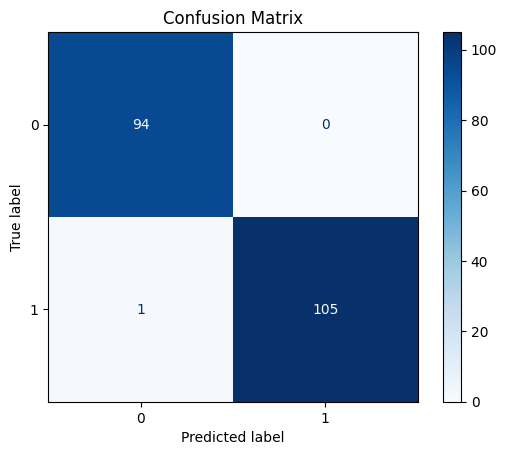

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_rfe)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

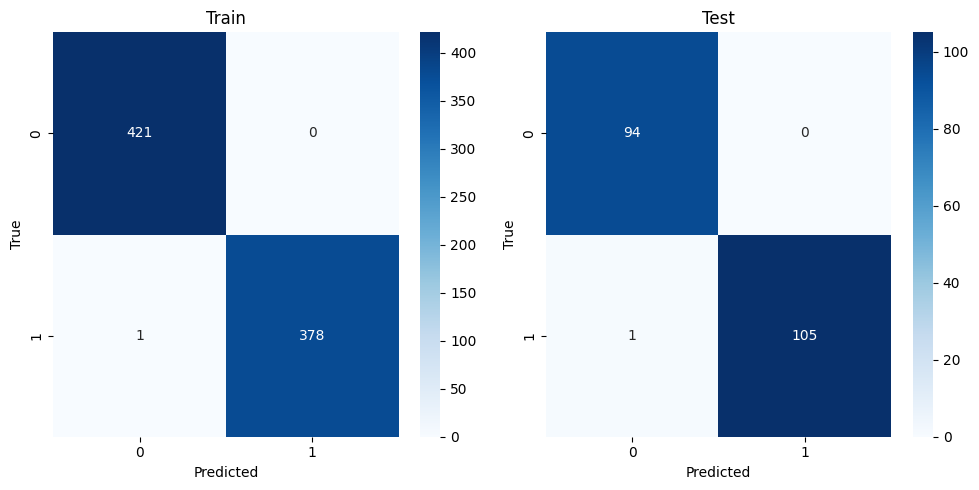

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the training set
y_train_pred = log_reg.predict(X_train_rfe)

# Compute the confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)

# Compute the confusion matrix for testing data
cm_test = confusion_matrix(y_test, y_pred_rfe)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Create a heatmap for training data
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Train')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Create a heatmap for testing data
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Test')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()


Cross-validation scores (tuned): [1.     0.975  1.     0.9875 0.9875 0.975  1.     0.9875 0.9875 1.    ]
Mean CV score (tuned): 0.99


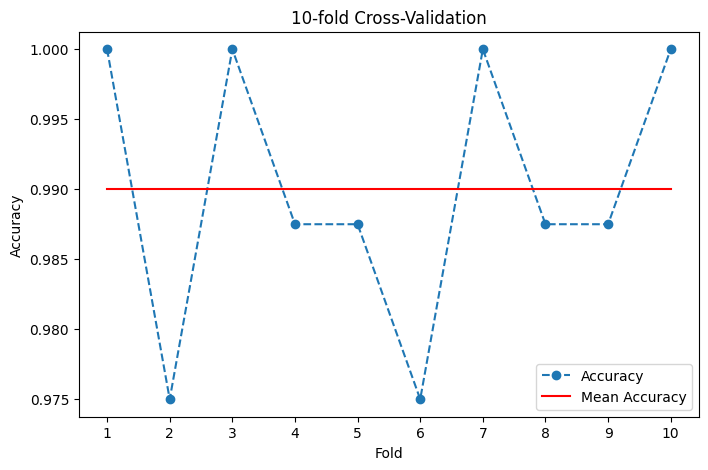

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=10)

print("Cross-validation scores (tuned):", cv_scores)
print("Mean CV score (tuned):", cv_scores.mean())

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 11), [cv_scores.mean()] * 10, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 11))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('10-fold Cross-Validation')
plt.legend()
plt.show()

ROC curve

AUC: 1.000


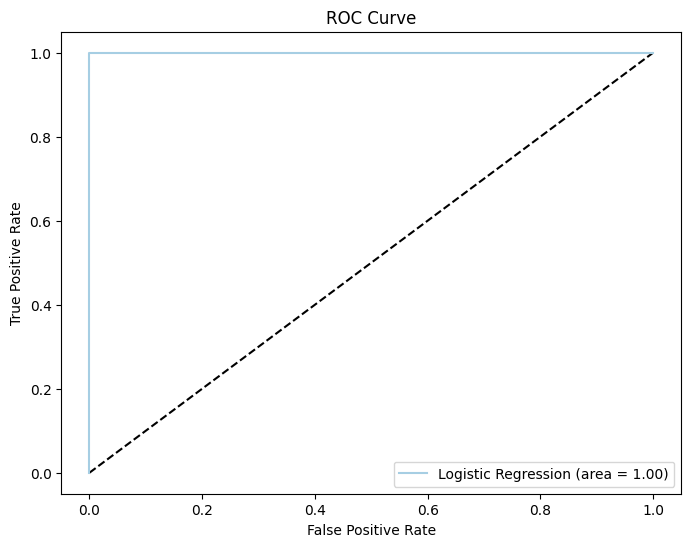

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt


# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test_rfe)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Compute and print AUC score
roc_auc = auc(fpr, tpr)
print('AUC: {:.3f}'.format(roc_auc))

# Create ROC plot
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

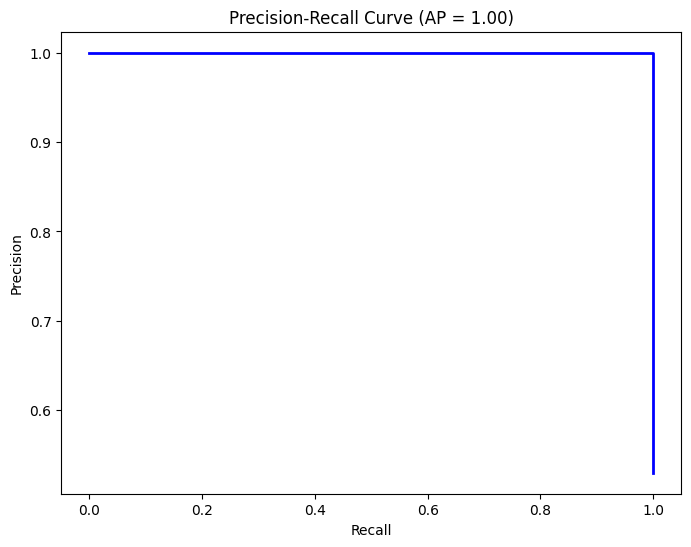

In [ ]:
# Plotting the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.show()

In [ ]:
from sklearn.metrics import log_loss

# Lists to store training and testing accuracy values
train_accuracy_values = []
test_accuracy_values = []
# Lists to store training and testing loss values
train_loss_values = []
test_loss_values = []
# Train the model for 20 epochs
for epoch in range(1, 51):
    log_reg.fit(X_train_rfe, y_train)
    # Evaluate on train and test data
    train_accuracy = accuracy_score(y_train, log_reg.predict(X_train_rfe))
    test_accuracy = accuracy_score(y_test, log_reg.predict(X_test_rfe))
    train_loss = log_loss(y_train, log_reg.predict_proba(X_train_rfe))
    test_loss = log_loss(y_test, log_reg.predict_proba(X_test_rfe))
    # Append accuracy and loss values to lists
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)
    train_loss_values.append(train_loss)
    test_loss_values.append(test_loss)
    print(f"Epoch {epoch}: Train accuracy - {train_accuracy:.4f}, Test accuracy - {test_accuracy:.4f}, "
          f"Train loss - {train_loss:.4f}, Test loss - {test_loss:.4f}")

Epoch 1: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 2: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 3: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 4: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 5: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 6: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 7: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 8: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 9: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 10: Train accuracy - 0.9988, Test accuracy - 0.9950, Train loss - 0.0263, Test loss - 0.0243
Epoch 11: Train acc

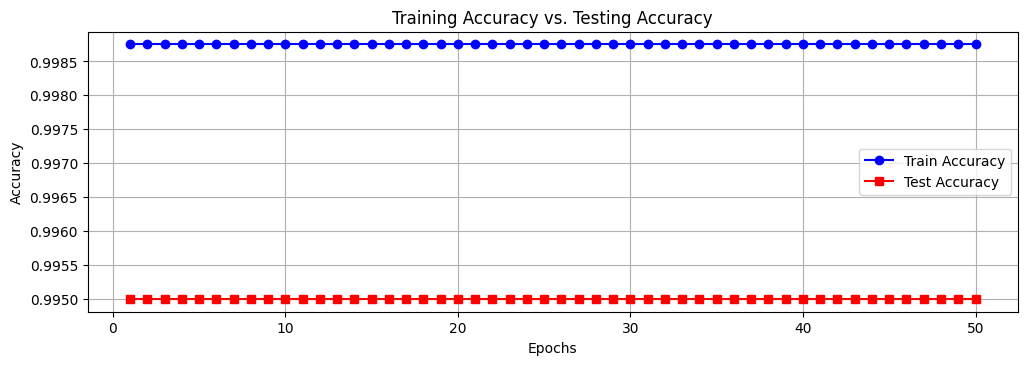

In [ ]:
# Plot training accuracy vs. testing accuracy
epochs = np.arange(1, 51)
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, train_accuracy_values, marker='o', label='Train Accuracy', linestyle='-', color='b')
plt.plot(epochs, test_accuracy_values, marker='s', label='Test Accuracy', linestyle='-', color='r')
plt.title("Training Accuracy vs. Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

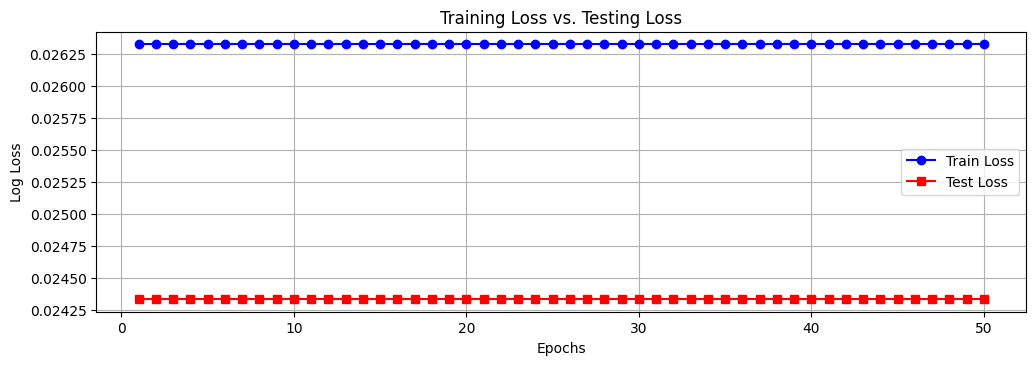

In [ ]:
# Plot training loss vs. testing loss
epochs = np.arange(1, 51)
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(epochs, train_loss_values, marker='o', label='Train Loss', linestyle='-', color='b')
plt.plot(epochs, test_loss_values, marker='s', label='Test Loss', linestyle='-', color='r')
plt.title("Training Loss vs. Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
data[data['Gender'] == 0]['Dementia'].value_counts()

Series([], Name: Dementia, dtype: int64)

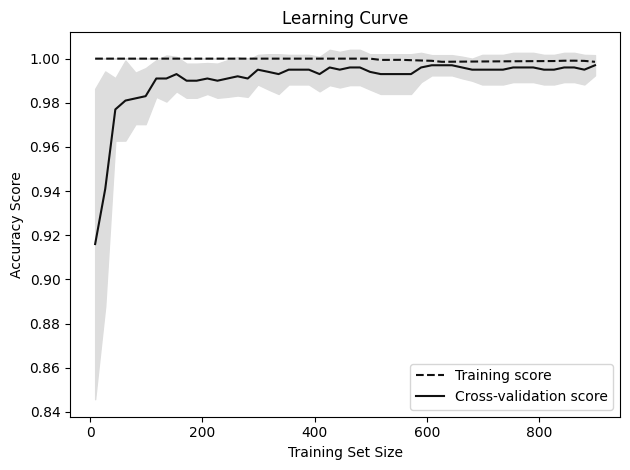

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(log_reg, X, y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

shap

In [ ]:
import shap

# Initialize JavaScript visualizations
shap.initjs()

In [ ]:
# Create an explainer object
explainer = shap.LinearExplainer(log_reg, X_train_rfe)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_rfe)

In [ ]:
# Get the feature names
feature_names = np.array(X_train.columns)
selected_features = feature_names[rfe.support_]

In [ ]:
X_train_rfe = pd.DataFrame(X_train_rfe, columns=selected_features)
X_test_rfe = pd.DataFrame(X_test_rfe, columns=selected_features)

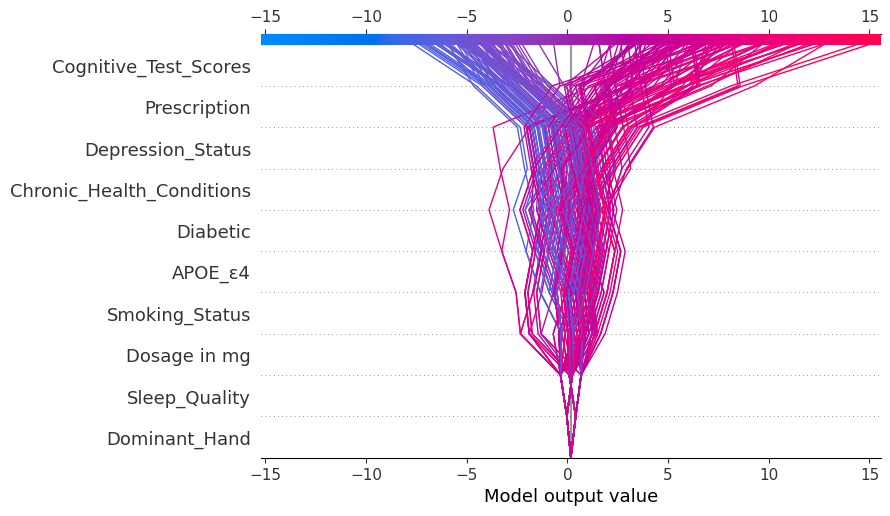

In [ ]:
fig = plt.figure()
shap.decision_plot(explainer.expected_value, shap_values, X_test_rfe)
plt.show()

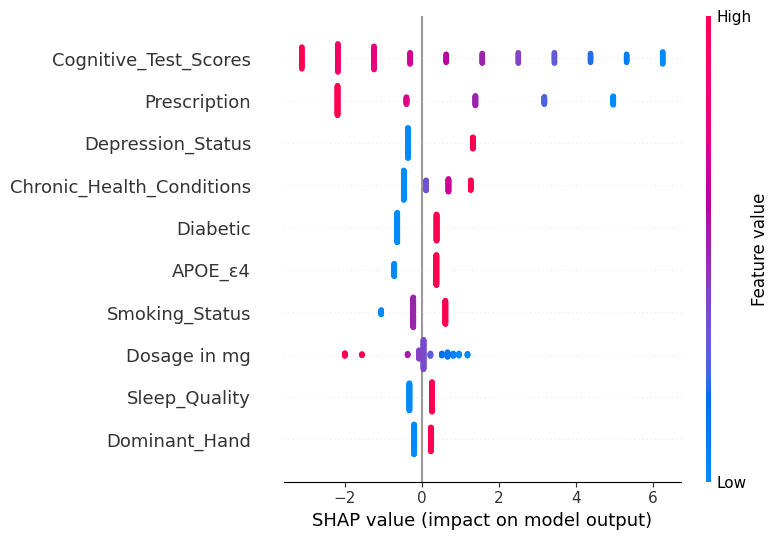

In [ ]:
fig = plt.figure()
shap.summary_plot(shap_values, X_test_rfe)
plt.show()

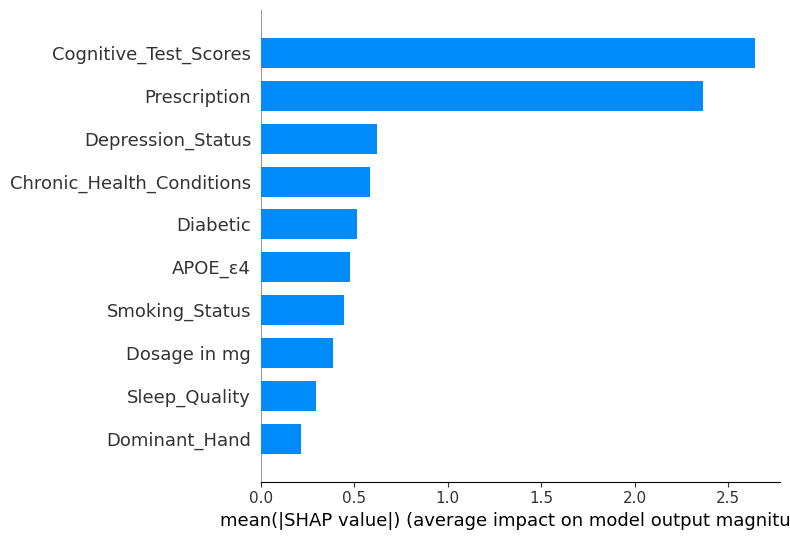

In [ ]:
shap.summary_plot(shap_values, X_test_rfe, plot_type="bar")

In [ ]:
shap.initjs()
#fig = plt.figure()
i = 1
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test_rfe.iloc[i,:])

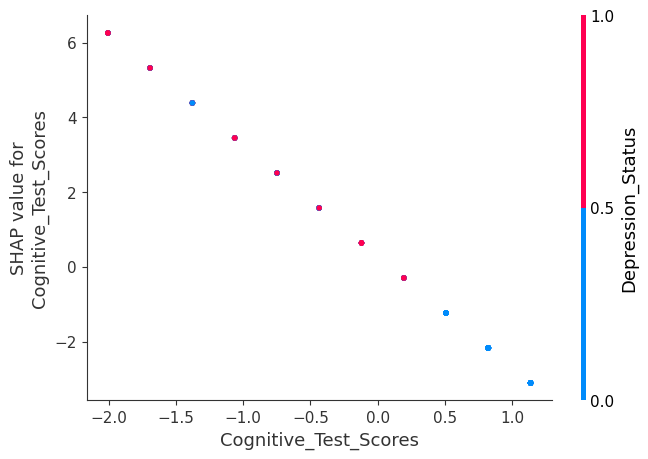

In [ ]:
shap.dependence_plot("Cognitive_Test_Scores", shap_values, X_test_rfe, interaction_index="Depression_Status", feature_names=X_test_rfe.columns)

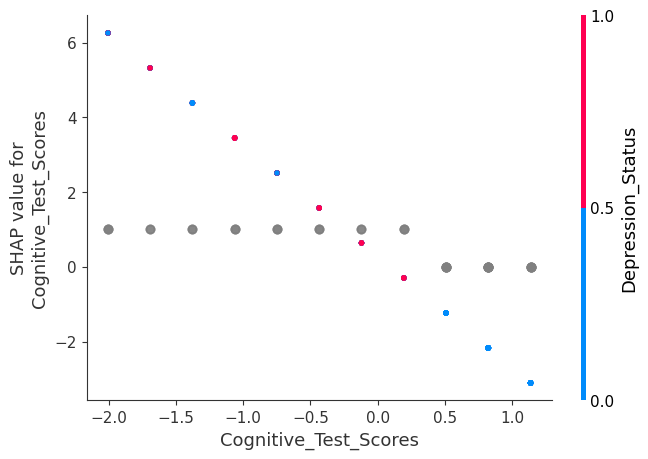

In [ ]:
import matplotlib.pyplot as plt

shap.dependence_plot("Cognitive_Test_Scores", shap_values, X_test_rfe, interaction_index="Depression_Status", feature_names=X_test_rfe.columns, show=False)
plt.scatter(X_test_rfe["Cognitive_Test_Scores"], y_test, color="gray", alpha=0.2)
plt.show()

In [ ]:
X_train_rfe.shape

(800, 10)

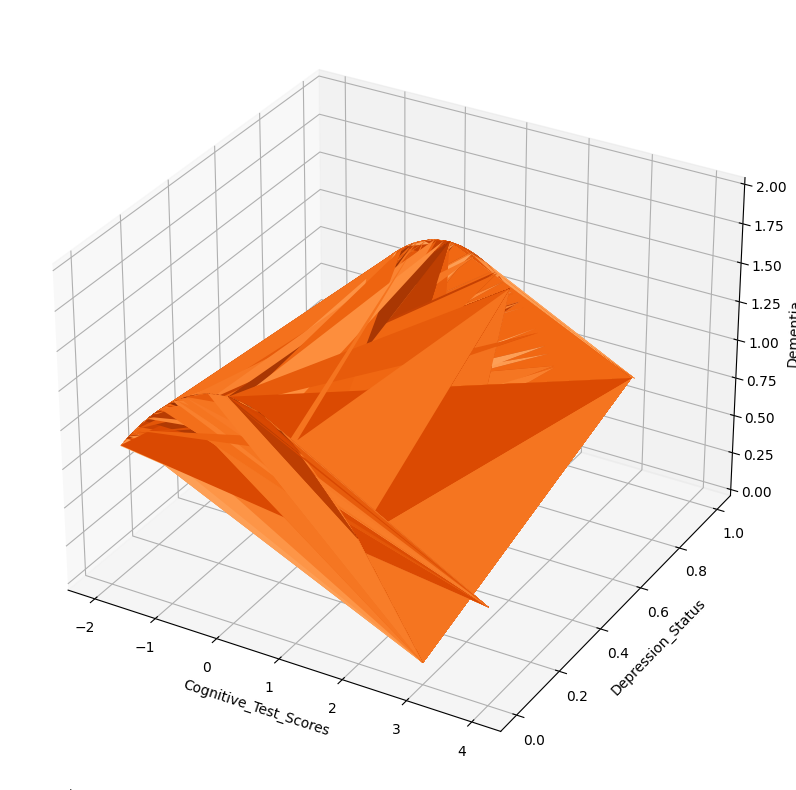

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ax = plt.figure(figsize=(15,10)).add_subplot(projection='3d')
Z = np.sqrt(np.abs(np.cos(X_train) + np.cos(y_train)))
ax.plot_surface(X_train + 1e5, y_train + 1e5, Z, cmap='Oranges', cstride=5, rstride=2)
ax.set_xlabel("Cognitive_Test_Scores")
ax.set_ylabel("Depression_Status")
ax.set_zlabel("Dementia")
ax.set_zlim(0, 2)
plt.show()


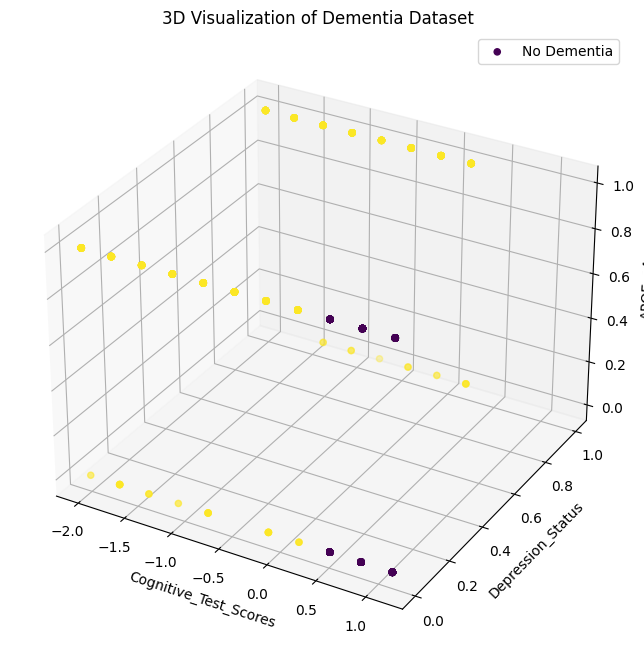

In [ ]:
# prompt: generarte diff important 3d plot meaningful for this study for research purpose

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'X_train_rfe' and 'y_train' are defined
# Select three features for the 3D plot
features = ['Cognitive_Test_Scores', 'Depression_Status', 'APOE_ε4']

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_train_rfe[features[0]], X_train_rfe[features[1]], X_train_rfe[features[2]], c=y_train, cmap='viridis')

# Set axis labels and title
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
ax.set_title('3D Visualization of Dementia Dataset')

# Add a legend for the target variable
plt.legend(['No Dementia', 'Dementia'])

# Display the plot
plt.show()


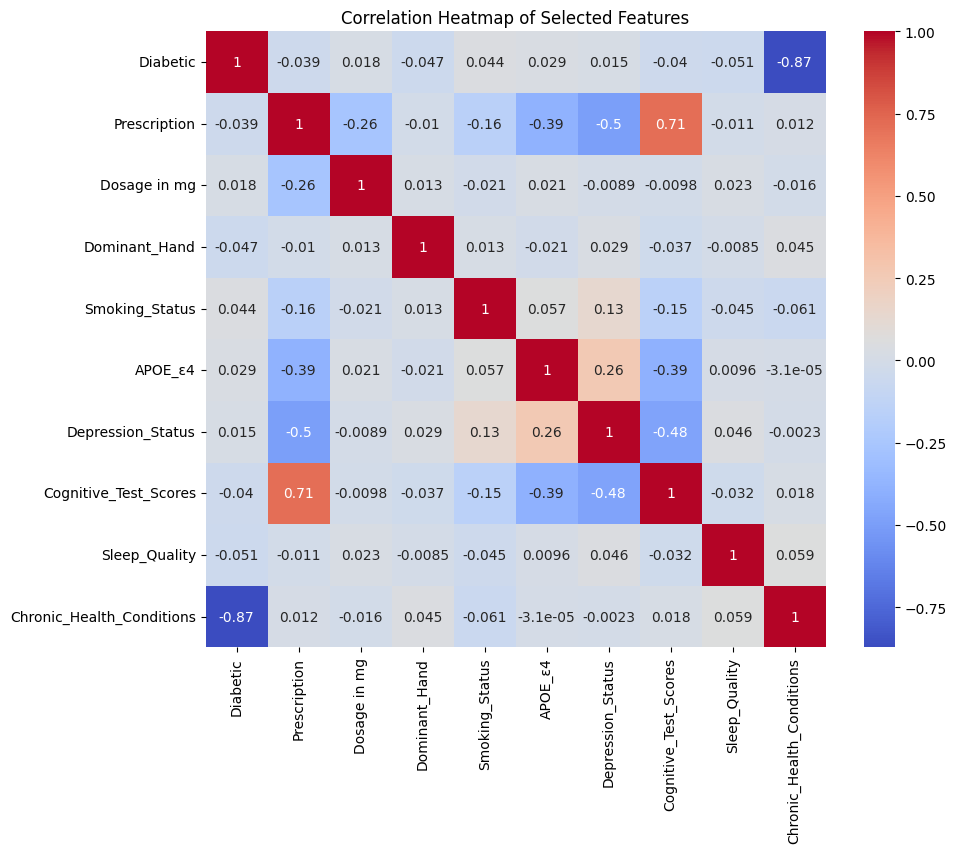

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X_train_rfe' is defined
# Calculate the correlation matrix for the selected features
corr_matrix = X_train_rfe.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()
